# Introducción

## Librerías

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import xml.etree.ElementTree as ET


import string
from wordfreq import word_frequency
from collections import Counter
from nltk.corpus import stopwords
import nltk

from scipy.stats import pearsonr, spearmanr, linregress

## Carga de ficheros

In [277]:
# -- QRELS
# Cargar archivos de Qrels para 2020
qrels_2020_harmful = pd.read_csv("Qrels/trec-misinfo-resources/qrels/2020-derived-qrels/misinfo-qrels-graded.harmful-only", sep=' ', names=["topic", "iter", "docno", "score"])
qrels_2020_helpful = pd.read_csv("Qrels/trec-misinfo-resources/qrels/2020-derived-qrels/misinfo-qrels-graded.helpful-only", sep=' ', names=["topic", "iter", "docno", "score"])

# Cargar archivos de Qrels para 2021
qrels_2021_harmful = pd.read_csv("Qrels/misinfo-resources-2021/qrels/2021-derived-qrels/misinfo-qrels-graded.harmful-only", sep=' ', names=["topic", "iter", "docno", "score"])
qrels_2021_helpful = pd.read_csv("Qrels/misinfo-resources-2021/qrels/2021-derived-qrels/misinfo-qrels-graded.helpful-only", sep=' ', names=["topic", "iter", "docno", "score"])

# Cargar archivos de Qrels para 2022
qrels_2022_harmful = pd.read_csv("Qrels/trec2022-health-misinfo-resources/qrels/2022-derived-qrels/misinfo-qrels.graded-harmful-only", sep=' ', names=["topic", "iter", "docno", "score"])
qrels_2022_helpful = pd.read_csv("Qrels/trec2022-health-misinfo-resources/qrels/2022-derived-qrels/misinfo-qrels.graded-helpful-only", sep=' ', names=["topic", "iter", "docno", "score"])

# -- TOPICS
# Función para parsear XML y convertirlo en un DataFrame
def parse_xml_to_dataframe(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    data = []
    for topic in root.findall(".//topic"):
        topic_data = {child.tag: child.text for child in topic}
        data.append(topic_data)
    
    return pd.DataFrame(data)

# Rutas de los archivos
files = {
    "topics_2020": "Qrels/trec-misinfo-resources/topics/misinfo-2020-topics.xml",
    "topics_2021": "Qrels/misinfo-resources-2021/topics/misinfo-2021-topics.xml",
    "topics_2022": "Qrels/trec2022-health-misinfo-resources/topics/misinfo-2022-topics.xml",
}

# Convertir archivos en DataFrames
topics_2020 = parse_xml_to_dataframe(files["topics_2020"])
topics_2021 = parse_xml_to_dataframe(files["topics_2021"])
topics_2022 = parse_xml_to_dataframe(files["topics_2022"])

# Visualización de Dataframes

## Qrels

In [278]:
def display_df(name, df):
    print(f"\n{name} - Primeras filas")
    display(df.head())

display_df("Qrels 2020 Harmful", qrels_2020_harmful)
display_df("Qrels 2020 Helpful", qrels_2020_helpful)
display_df("Qrels 2021 Harmful", qrels_2021_harmful)
display_df("Qrels 2021 Helpful", qrels_2021_helpful)
display_df("Qrels 2022 Harmful", qrels_2022_harmful)
display_df("Qrels 2022 Helpful", qrels_2022_helpful)


Qrels 2020 Harmful - Primeras filas


,topic,iter,docno,score
0,1,0,0113bb03-2a3a-4602-9394-d2fe911b624a,1
1,1,0,015c98bf-8632-4537-9038-7bc3e128cb97,2
2,1,0,01e198e3-ec00-432d-92f0-cca8251db33d,2
3,1,0,02700110-5195-4cee-b584-8fe6d870e2dd,2
4,1,0,02fb6095-115b-4418-bb34-8b76cc65059c,1



Qrels 2020 Helpful - Primeras filas


,topic,iter,docno,score
0,1,0,05a0c77a-7eaa-4fdf-b8a1-d5c5c7048688,2
1,1,0,05e75cc8-ac9c-4f53-b7eb-6a15118ab9c4,2
2,1,0,05fcf788-873b-4345-851b-b538d63ca404,2
3,1,0,06061d56-cb76-4a85-bd29-79add8f06928,1
4,1,0,06407959-db39-464e-9055-09007db815fb,2



Qrels 2021 Harmful - Primeras filas


,topic,iter,docno,score
0,101,0,en.noclean.c4-train.00005-of-07168.143426,1
1,101,0,en.noclean.c4-train.00044-of-07168.58816,1
2,101,0,en.noclean.c4-train.00173-of-07168.139550,2
3,101,0,en.noclean.c4-train.00263-of-07168.86388,1
4,101,0,en.noclean.c4-train.00285-of-07168.127397,3



Qrels 2021 Helpful - Primeras filas


,topic,iter,docno,score
0,101,0,en.noclean.c4-train.00119-of-07168.41683,3
1,101,0,en.noclean.c4-train.00158-of-07168.6219,1
2,101,0,en.noclean.c4-train.00365-of-07168.34369,3
3,101,0,en.noclean.c4-train.00416-of-07168.113456,5
4,101,0,en.noclean.c4-train.00444-of-07168.126346,1



Qrels 2022 Harmful - Primeras filas


,topic,iter,docno,score
0,151,0,en.noclean.c4-train.00884-of-07168.53989,1
1,151,0,en.noclean.c4-train.00920-of-07168.36718,1
2,151,0,en.noclean.c4-train.00945-of-07168.98682,1
3,151,0,en.noclean.c4-train.01555-of-07168.2467,1
4,151,0,en.noclean.c4-train.01615-of-07168.94520,1



Qrels 2022 Helpful - Primeras filas


,topic,iter,docno,score
0,151,0,en.noclean.c4-train.02455-of-07168.38462,7
1,151,0,en.noclean.c4-train.05377-of-07168.60016,7
2,151,0,en.noclean.c4-train.00058-of-07168.67073,6
3,151,0,en.noclean.c4-train.01484-of-07168.132100,6
4,151,0,en.noclean.c4-train.04490-of-07168.146221,6


## Topics

In [279]:
display_df("Topics de 2020", topics_2020)
display_df("Topics de 2021", topics_2021)
display_df("Topics de 2022", topics_2022)


Topics de 2020 - Primeras filas


,number,title,description,answer,evidence,narrative
0,1,Vitamin D COVID-19,Can vitamin D cure COVID-19?,no,https://www.thelancet.com/journals/landia/arti...,"As well as causing other health problems, a Vi..."
1,2,Vitamin C COVID-19,Can vitamin C cure COVID-19?,no,https://www.health.harvard.edu/diseases-and-co...,High doses of Vitamin C have been used to trea...
2,3,BCG vaccine COVID-19,Can BCG vaccine prevent COVID-19?,no,https://www.nature.com/articles/s41577-020-0337-y,BCG vaccines have been considered as a possibl...
3,4,Ibuprofen COVID-19,Can ibuprofen worsen COVID-19?,no,https://www.who.int/news-room/commentaries/det...,Ibuprofen is an anti-inflammatory drug used to...
4,5,Salt water COVID-19,Can gargling salt water prevent COVID-19?,no,https://www.who.int/emergencies/diseases/novel...,Gargling with salt water has been rumored to k...



Topics de 2021 - Primeras filas


,number,query,description,narrative,disclaimer,stance,evidence
0,101,ankle brace achilles tendonitis,Will wearing an ankle brace help heal achilles...,Achilles tendonitis is a condition where one e...,We do not claim to be providing medical advice...,unhelpful,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,102,tepid sponge bath reduce fever children,Is a tepid sponge bath a good way to reduce fe...,Fever can boost the immune system and therefor...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/9115527/
2,103,folic acid dementia,Can folic acid help improve cognition and trea...,Dementia is a general term for loss of cogniti...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/14584018/
3,104,duct tape warts,Does duct tape work for wart removal?,Duct tape is a plastic and cloth backed adhesi...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/22972052/
4,105,put ice on a burn,Should I apply ice to a burn?,Many people commonly put on ice on burns in an...,We do not claim to be providing medical advice...,unhelpful,https://www.uwhealth.org/news/the-right-way-to...



Topics de 2022 - Primeras filas


,number,question,query,background,disclaimer,answer,evidence
0,151,Do tea bags help to clot blood in pulled teeth?,tea bags clot blood pulled teeth,Tea bags are small bags containing dried tea t...,We do not claim to be providing medical advice...,yes,https://www.webmd.com/oral-health/wisdom-teeth
1,152,Can crystals heal?,crystals heal,This question is asking if placing semipreciou...,We do not claim to be providing medical advice...,no,https://www.webmd.com/balance/news/20180116/ca...
2,153,Can collagen supplements cure osteoarthritis?,collagen supplements osteoarthritis,Osteoarthritis is a degenerative joint disease...,We do not claim to be providing medical advice...,no,https://link.springer.com/article/10.1007/s407...
3,154,Can cell phones cause cancer?,cell phone cancer,Cell phones emit radio waves (non-ionizing rad...,We do not claim to be providing medical advice...,no,https://www.cancer.gov/about-cancer/causes-pre...
4,155,Can you use WD-40 for arthritis?,WD-40 arthritis,WD-40 is an oil-based lubricant. Arthritis is ...,We do not claim to be providing medical advice...,no,https://wd40.co.uk/tips-and-tricks/can-wd-40-h...


## Descripción de Qrels y Topics

#### 1. Qrels (Query Relevance Files)
Los **Qrels** contienen evaluaciones de documentos respecto a temas específicos. Estos archivos permiten medir qué tan útil o dañina es la información en los sistemas de recuperación de información.

 **Estructura de los archivos Qrels**
Cada línea en un archivo Qrels sigue la siguiente estructura:

| Columna | Nombre | Descripción |
|---------|--------|------------|
| **1** | `topic` | ID del tema al que pertenece el documento. |
| **2** | `iter` | Siempre es `0`, la obviaremos. |
| **3** | `docno` | Identificador único del documento evaluado. |
| **4** | `score` | Clasificación del documento según su utilidad o peligrosidad. |

**Tipos de Qrels**

- **helpful** → Evalúa qué tan útil es un documento. Se incluyen todos los documentos con una puntuación mayor que 0 (es decir, los valores 1, 2, 3 y 4).
- **harmful** → Evalúa qué tan dañino es un documento. Se generan tomando solo los valores negativos, pero con su valor absoluto.

##### SCORES DE 2020

| **Score** | **Descripción** | **Utilidad** | **Información correcta** | **Credibilidad** |
|-----------|---------------|-------------|---------------|-----------------|
| **4**  | Útil, correcto y creíble. | 1 | 1 | 1 |
| **3**  | Útil, correcto, pero no creíble o sin juicio de credibilidad. | 1 | 1 | 0 o -1 |
| **2**  | Útil, sin respuesta o sin juicio sobre la respuesta, pero creíble. | 1 | 2 o -1 | 1 |
| **1**  | Útil, sin respuesta o sin juicio sobre la respuesta, y además no creíble o sin juicio de credibilidad. | 1 | 2 o -1 | 0 o -1 |
| **0**  | No útil, se ignora la respuesta y la credibilidad. | 0 | - | - |
| **-1** | Útil, incorrecto, y además no creíble o sin juicio de credibilidad. | 1 | 0 | 0 o -1 |
| **-2** | Útil, incorrecto, pero creíble. | 1 | 0 | 1 |

##### SCORES DE 2021

| Score | Utilidad           | Corrección               | Credibilidad                 |
|----------------------|--------------------|--------------------------|------------------------------|
| 12                  | Muy útil           | Correcto                 | Excelente                    |
| 11                  | Útil               | Correcto                 | Excelente                    |
| 10                  | Muy útil           | Correcto                 | Buena                        |
| 9                   | Útil               | Correcto                 | Buena                        |
| 8                   | Muy útil           | Correcto                 | Baja o No Evaluada           |
| 7                   | Útil               | Correcto                 | Baja o No Evaluada           |
| 6                   | Muy útil           | Neutral o No Evaluado    | Excelente                    |
| 5                   | Útil               | Neutral o No Evaluado    | Excelente                    |
| 4                   | Muy útil           | Neutral o No Evaluado    | Buena                        |
| 3                   | Útil               | Neutral o No Evaluado    | Buena                        |
| 2                   | Muy útil           | Neutral o No Evaluado    | Baja o No Evaluada           |
| 1                   | Útil               | Neutral o No Evaluado    | Baja o No Evaluada           |
| 0                   | No útil            | No Evaluado              | No Evaluado                  |
| -1                  | Muy útil o Útil    | Incorrecto               | Baja o No Evaluada           |
| -2                  | Muy útil o Útil    | Incorrecto               | Buena                        |
| -3                  | Muy útil o Útil    | Incorrecto               | Excelente                    |
---

#### 2. Topics (Temas de búsqueda)
Los **Topics** contienen las preguntas o consultas que los usuarios podrían hacer en un buscador de información médica. Estos temas se usan para evaluar qué documentos son relevantes o desinformativos.

**Estructura de los archivos Topics**
En este caso, no mantienen la misma estructura, ya que cada año las columnas tienen nombres diferentes.

| Campo | Descripción |
|--------|------------|
| **number** (2020, 2021, 2023) | ID único del tema (coincide con `topic` en los Qrels). |
| **query** | Consulta corta que un usuario escribiría en un buscador (ej. `"put ice on a burn"`). |
| **description** (2020, 2021) / **question** (2022)| Pregunta más detallada sobre el tema (ej. `"Should I apply ice to a burn?"`). |
| **narrative** (2020, 2021) / **background** (2022) | Explicación más extensa sobre el tema, proporcionando contexto adicional. |
| **disclaimer** (2020, 2021, 2023)| Aviso de que la información no debe tomarse como consejo médico. |
| **stance** (2021) / **answer** (2020, 2022)| Indica la posición oficial respecto al tema: <br> `helpful` / `unhelpful` en 2021, `yes` / `no` en 2020, 2022. |
| **evidence** | Fuente utilizada para determinar la respuesta oficial del tema. |

---


# Limpieza y transformación

In [280]:
display(topics_2020.dtypes)
display(topics_2021.dtypes)
display(topics_2022.dtypes)

number         object
title          object
description    object
answer         object
evidence       object
narrative      object
dtype: object

number         object
query          object
description    object
narrative      object
disclaimer     object
stance         object
evidence       object
dtype: object

number        object
question      object
query         object
background    object
disclaimer    object
answer        object
evidence      object
dtype: object

In [281]:
topics_2020['number'] = topics_2020['number'].astype(int)
topics_2021['number'] = topics_2021['number'].astype(int)
topics_2022['number'] = topics_2022['number'].astype(int)
display(topics_2020.dtypes)
display(topics_2021.dtypes)
display(topics_2022.dtypes)

number          int64
title          object
description    object
answer         object
evidence       object
narrative      object
dtype: object

number          int64
query          object
description    object
narrative      object
disclaimer     object
stance         object
evidence       object
dtype: object

number         int64
question      object
query         object
background    object
disclaimer    object
answer        object
evidence      object
dtype: object

In [282]:
print(qrels_2020_harmful.duplicated().sum())
print(qrels_2020_helpful.duplicated().sum())
print(qrels_2021_harmful.duplicated().sum())
print(qrels_2021_helpful.duplicated().sum())
print(qrels_2022_harmful.duplicated().sum())
print(qrels_2022_helpful.duplicated().sum())

0
0
0
0
0
0


In [283]:
qrels_2020_harmful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   805 non-null    int64 
 1   iter    805 non-null    int64 
 2   docno   805 non-null    object
 3   score   805 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 25.3+ KB


# Estadísticas generales

<Axes: >

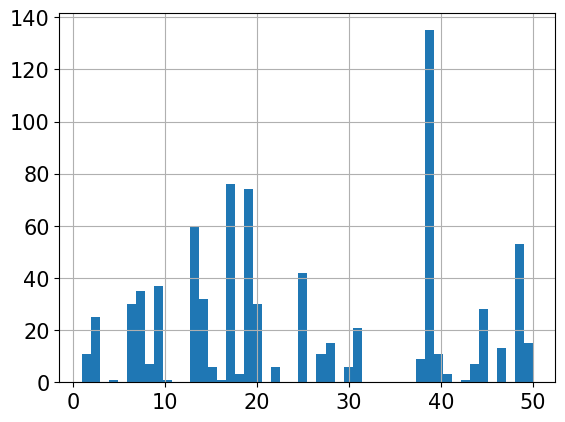

In [284]:
qrels_2020_harmful['topic'].hist(bins=50)

In [285]:
print('HARMFUL\n2020')
print(qrels_2020_harmful["score"].value_counts())
print('\n2021')
print(qrels_2021_harmful["score"].value_counts())
print('\n2022')
print(qrels_2022_harmful["score"].value_counts())

HARMFUL
2020
score
2    403
1    402
Name: count, dtype: int64

2021
score
2    722
1    679
3    195
Name: count, dtype: int64

2022
score
1    1236
2     198
Name: count, dtype: int64


In [286]:
print('HELPFUL\n2020')
print(qrels_2020_helpful["score"].value_counts())
print('\n2021')
print(qrels_2021_helpful["score"].value_counts())
print('\n2022')
print(qrels_2022_helpful["score"].value_counts())

HELPFUL
2020
score
2    2947
4    2546
1     572
3     386
Name: count, dtype: int64

2021
score
3     897
10    825
9     763
1     697
7     629
8     417
12    172
11    154
4     132
5      94
2      56
6      37
Name: count, dtype: int64

2022
score
3     3087
1      875
4      573
5      165
2      107
6       72
7       53
8       42
10      27
9       26
11      18
12      15
13       4
14       3
Name: count, dtype: int64


array([[<Axes: title={'center': 'topic'}>,
        <Axes: title={'center': 'iter'}>],
       [<Axes: title={'center': 'score'}>, <Axes: >]], dtype=object)

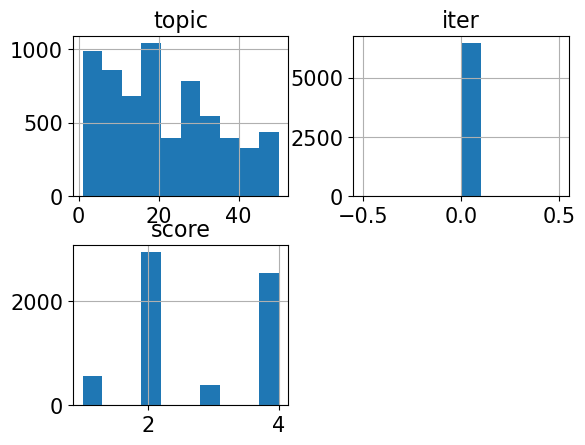

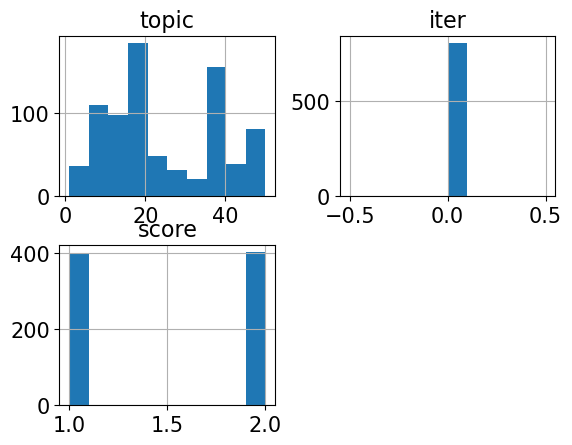

In [287]:
qrels_2020_helpful.hist()
qrels_2020_harmful.hist()

array([[<Axes: title={'center': 'topic'}>,
        <Axes: title={'center': 'iter'}>],
       [<Axes: title={'center': 'score'}>, <Axes: >]], dtype=object)

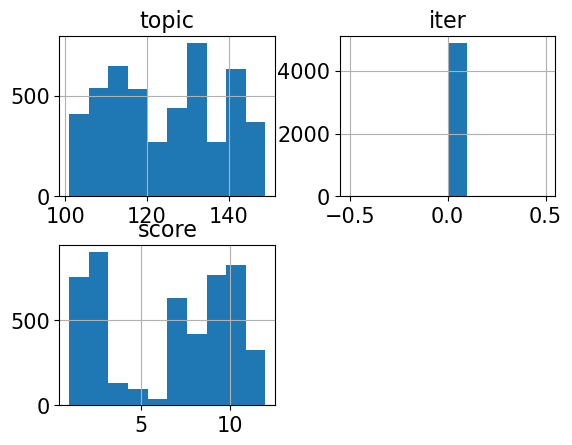

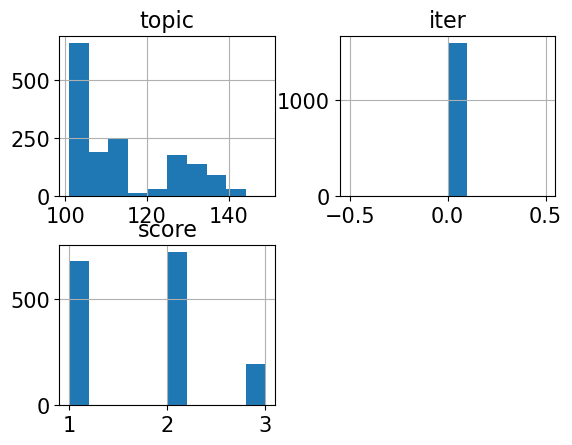

In [288]:
qrels_2021_helpful.hist()
qrels_2021_harmful.hist()

array([[<Axes: title={'center': 'topic'}>,
        <Axes: title={'center': 'iter'}>],
       [<Axes: title={'center': 'score'}>, <Axes: >]], dtype=object)

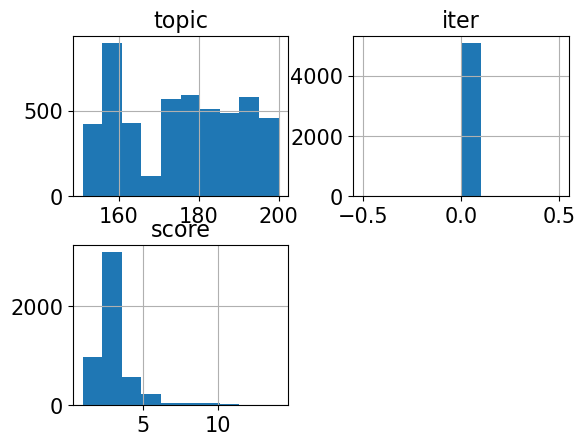

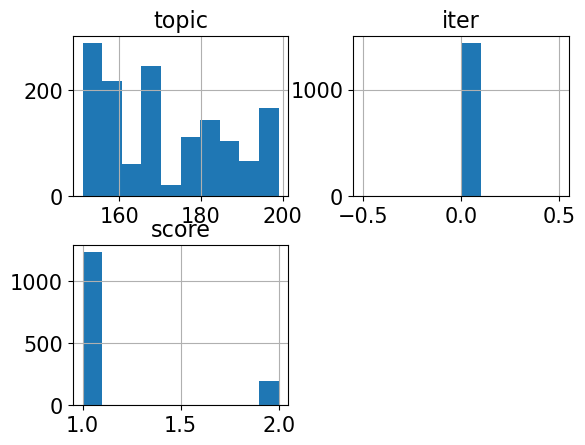

In [289]:
qrels_2022_helpful.hist()
qrels_2022_harmful.hist()

In [290]:
print(qrels_2020_harmful.value_counts())

topic  iter  docno                                 score
1      0     0113bb03-2a3a-4602-9394-d2fe911b624a  1        1
39     0     0838d01d-5b2c-4b8b-88b1-dd5cce7bb46f  2        1
38     0     37bb66bc-0c8a-40ba-9854-0546318c7a46  1        1
             461a96f8-ffda-4f1e-858e-f59f8c524c2f  1        1
             5b3b6b2c-e718-44b7-9d26-31862ded9866  2        1
                                                           ..
17     0     7e554aba-9ba8-4330-b2a3-01add7090558  2        1
             8263a5e2-daff-4103-b7a5-31c67564271e  2        1
             90977e68-9a0e-46f6-9132-5bb4e4ea52f8  2        1
             a10989ff-d520-44ff-a944-49ce64480404  2        1
50     0     ecce2c63-48b5-400b-a52d-f9512cc4b23d  1        1
Name: count, Length: 805, dtype: int64


# 2020

In [291]:
print('HARMFUL 2020')
print(qrels_2020_harmful["score"].value_counts())

print('\nHELPFUL 2020')
print(qrels_2020_helpful["score"].value_counts())


HARMFUL 2020
score
2    403
1    402
Name: count, dtype: int64

HELPFUL 2020
score
2    2947
4    2546
1     572
3     386
Name: count, dtype: int64


In [292]:
qrels_2020_harmful["category"] = "harmful"
qrels_2020_helpful["category"] = "helpful"
qrels_2020_helpful

,topic,iter,docno,score,category
0,1,0,05a0c77a-7eaa-4fdf-b8a1-d5c5c7048688,2,helpful
1,1,0,05e75cc8-ac9c-4f53-b7eb-6a15118ab9c4,2,helpful
2,1,0,05fcf788-873b-4345-851b-b538d63ca404,2,helpful
3,1,0,06061d56-cb76-4a85-bd29-79add8f06928,1,helpful
4,1,0,06407959-db39-464e-9055-09007db815fb,2,helpful
...,...,...,...,...,...
6446,50,0,f60da83f-3162-460f-a35c-18eb1dc610e5,4,helpful
6447,50,0,f9a8c646-a14a-46fd-81a6-7cacbba07a54,2,helpful
6448,50,0,fa9fd78d-8160-441f-acda-92365cdad997,4,helpful
6449,50,0,fc7d8362-114f-4536-a51f-07275536558a,4,helpful


In [293]:
qrels_2020 = pd.concat([qrels_2020_harmful, qrels_2020_helpful], ignore_index=True)
qrels_2020 = qrels_2020.drop(columns=["iter"])
qrels_2020

,topic,docno,score,category
0,1,0113bb03-2a3a-4602-9394-d2fe911b624a,1,harmful
1,1,015c98bf-8632-4537-9038-7bc3e128cb97,2,harmful
2,1,01e198e3-ec00-432d-92f0-cca8251db33d,2,harmful
3,1,02700110-5195-4cee-b584-8fe6d870e2dd,2,harmful
4,1,02fb6095-115b-4418-bb34-8b76cc65059c,1,harmful
...,...,...,...,...
7251,50,f60da83f-3162-460f-a35c-18eb1dc610e5,4,helpful
7252,50,f9a8c646-a14a-46fd-81a6-7cacbba07a54,2,helpful
7253,50,fa9fd78d-8160-441f-acda-92365cdad997,4,helpful
7254,50,fc7d8362-114f-4536-a51f-07275536558a,4,helpful


In [294]:
topics_2020 = topics_2020.rename(columns={"number": "topic"})
topics_2020 = topics_2020.rename(columns={"description": "question"})
topics_2020 = topics_2020.rename(columns={"title": "query"})
topics_2020

,topic,query,question,answer,evidence,narrative
0,1,Vitamin D COVID-19,Can vitamin D cure COVID-19?,no,https://www.thelancet.com/journals/landia/arti...,"As well as causing other health problems, a Vi..."
1,2,Vitamin C COVID-19,Can vitamin C cure COVID-19?,no,https://www.health.harvard.edu/diseases-and-co...,High doses of Vitamin C have been used to trea...
2,3,BCG vaccine COVID-19,Can BCG vaccine prevent COVID-19?,no,https://www.nature.com/articles/s41577-020-0337-y,BCG vaccines have been considered as a possibl...
3,4,Ibuprofen COVID-19,Can ibuprofen worsen COVID-19?,no,https://www.who.int/news-room/commentaries/det...,Ibuprofen is an anti-inflammatory drug used to...
4,5,Salt water COVID-19,Can gargling salt water prevent COVID-19?,no,https://www.who.int/emergencies/diseases/novel...,Gargling with salt water has been rumored to k...
5,6,Ginger COVID-19,Can Ginger cure COVID-19?,no,https://sites.nationalacademies.org/basedonsci...,Ginger is claimed to have immunity boosting pr...
6,7,5G COVID-19,Can 5G antennas cause COVID-19?,no,https://www.who.int/emergencies/diseases/novel...,There have been rumors suggesting that 5G ante...
7,8,Herbal tea COVID-19,Can herbal tea prevent COVID-19?,no,https://time.com/5840148/coronavirus-cure-covi...,Herbal tea has been promoted as a preventative...
8,9,Convalescent plasma COVID-19,Can convalescent plasma cure COVID-19?,no,https://www.cochrane.org/CD013600/plasma-peopl...,Convalescent plasma has been used in the past ...
9,10,Pneumococcal vaccine COVID-19,Can pneumococcal vaccine prevent COVID-19?,no,https://www.who.int/emergencies/diseases/novel...,Rumors suggest that pneumococcal vaccine can p...


In [295]:
qrels_2020 = qrels_2020.merge(topics_2020, on="topic", how="left")
qrels_2020

,topic,docno,score,category,query,question,answer,evidence,narrative
0,1,0113bb03-2a3a-4602-9394-d2fe911b624a,1,harmful,Vitamin D COVID-19,Can vitamin D cure COVID-19?,no,https://www.thelancet.com/journals/landia/arti...,"As well as causing other health problems, a Vi..."
1,1,015c98bf-8632-4537-9038-7bc3e128cb97,2,harmful,Vitamin D COVID-19,Can vitamin D cure COVID-19?,no,https://www.thelancet.com/journals/landia/arti...,"As well as causing other health problems, a Vi..."
2,1,01e198e3-ec00-432d-92f0-cca8251db33d,2,harmful,Vitamin D COVID-19,Can vitamin D cure COVID-19?,no,https://www.thelancet.com/journals/landia/arti...,"As well as causing other health problems, a Vi..."
3,1,02700110-5195-4cee-b584-8fe6d870e2dd,2,harmful,Vitamin D COVID-19,Can vitamin D cure COVID-19?,no,https://www.thelancet.com/journals/landia/arti...,"As well as causing other health problems, a Vi..."
4,1,02fb6095-115b-4418-bb34-8b76cc65059c,1,harmful,Vitamin D COVID-19,Can vitamin D cure COVID-19?,no,https://www.thelancet.com/journals/landia/arti...,"As well as causing other health problems, a Vi..."
...,...,...,...,...,...,...,...,...,...
7251,50,f60da83f-3162-460f-a35c-18eb1dc610e5,4,helpful,Lemon water COVID-19,Can drinking lemon water prevent COVID-19?,no,https://health.clevelandclinic.org/can-drinkin...,People claim that the virus can't live in acid...
7252,50,f9a8c646-a14a-46fd-81a6-7cacbba07a54,2,helpful,Lemon water COVID-19,Can drinking lemon water prevent COVID-19?,no,https://health.clevelandclinic.org/can-drinkin...,People claim that the virus can't live in acid...
7253,50,fa9fd78d-8160-441f-acda-92365cdad997,4,helpful,Lemon water COVID-19,Can drinking lemon water prevent COVID-19?,no,https://health.clevelandclinic.org/can-drinkin...,People claim that the virus can't live in acid...
7254,50,fc7d8362-114f-4536-a51f-07275536558a,4,helpful,Lemon water COVID-19,Can drinking lemon water prevent COVID-19?,no,https://health.clevelandclinic.org/can-drinkin...,People claim that the virus can't live in acid...


In [296]:
qrels_2020["question"].nunique()


45

Después de unificar los qrels con los topics, el número de topics baja. Eso es debido a que no hay documentos para ciertos topics.

In [297]:
# Total de filas
total_qrels = len(qrels_2020)

# Total por categoría
category_counts = qrels_2020["category"].value_counts()

# Crear DataFrame con totales y porcentajes
summary = pd.DataFrame({
    "total": [total_qrels, total_qrels],
    "cantidad": [category_counts.get("harmful", 0), category_counts.get("helpful", 0)],
    "porcentaje": [
        f"{(category_counts.get('harmful', 0) / total_qrels * 100):.1f}%",
        f"{(category_counts.get('helpful', 0) / total_qrels * 100):.1f}%"
    ]
}, index=["harmful", "helpful"])

# Mostrar el resumen
print("\nResumen de documentos (2020):")
print("=" * 50)
print(f"Total de documentos: {total_qrels}")
print("\nDistribución por categoría:")
print(summary)


Resumen de documentos (2020):
Total de documentos: 7256

Distribución por categoría:
         total  cantidad porcentaje
harmful   7256       805      11.1%
helpful   7256      6451      88.9%


## Cantidad de documentos Harmful y Helpful por topic

In [298]:
# Contar el número de documentos harmful y helpful por topic
conteo = qrels_2020.groupby(["topic", "question", "category"]).size().unstack(fill_value=0)
conteo

,category,harmful,helpful
topic,question,,
1,Can vitamin D cure COVID-19?,11,302
2,Can vitamin C cure COVID-19?,25,162
3,Can BCG vaccine prevent COVID-19?,0,151
4,Can ibuprofen worsen COVID-19?,1,237
5,Can gargling salt water prevent COVID-19?,0,132
6,Can Ginger cure COVID-19?,30,103
7,Can 5G antennas cause COVID-19?,35,123
8,Can herbal tea prevent COVID-19?,7,200
9,Can convalescent plasma cure COVID-19?,37,341


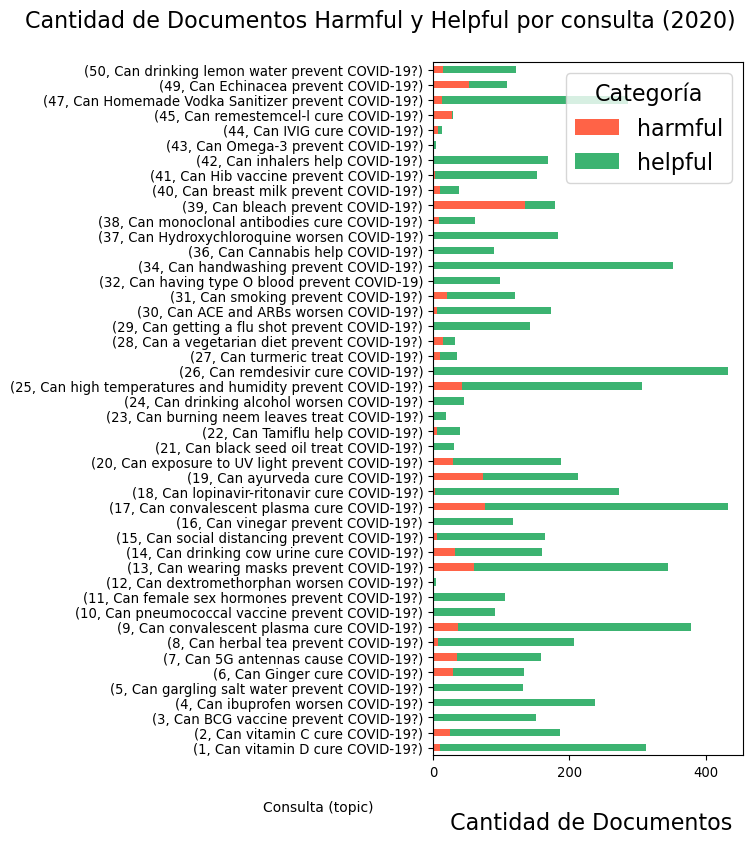

In [299]:

conteo.plot(kind="barh", stacked=True, color=["tomato", "mediumseagreen"], figsize=(4, 9))
plt.xlabel("\n Cantidad de Documentos")
plt.ylabel("")
plt.title("Cantidad de Documentos Harmful y Helpful por consulta (2020) \n", loc='right')
plt.legend(title="Categoría")
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.text(-250, -4.2, "Consulta (topic)", fontsize=10, rotation=0)

plt.show()

#SELECCIONADO

<Figure size 1000x2000 with 0 Axes>

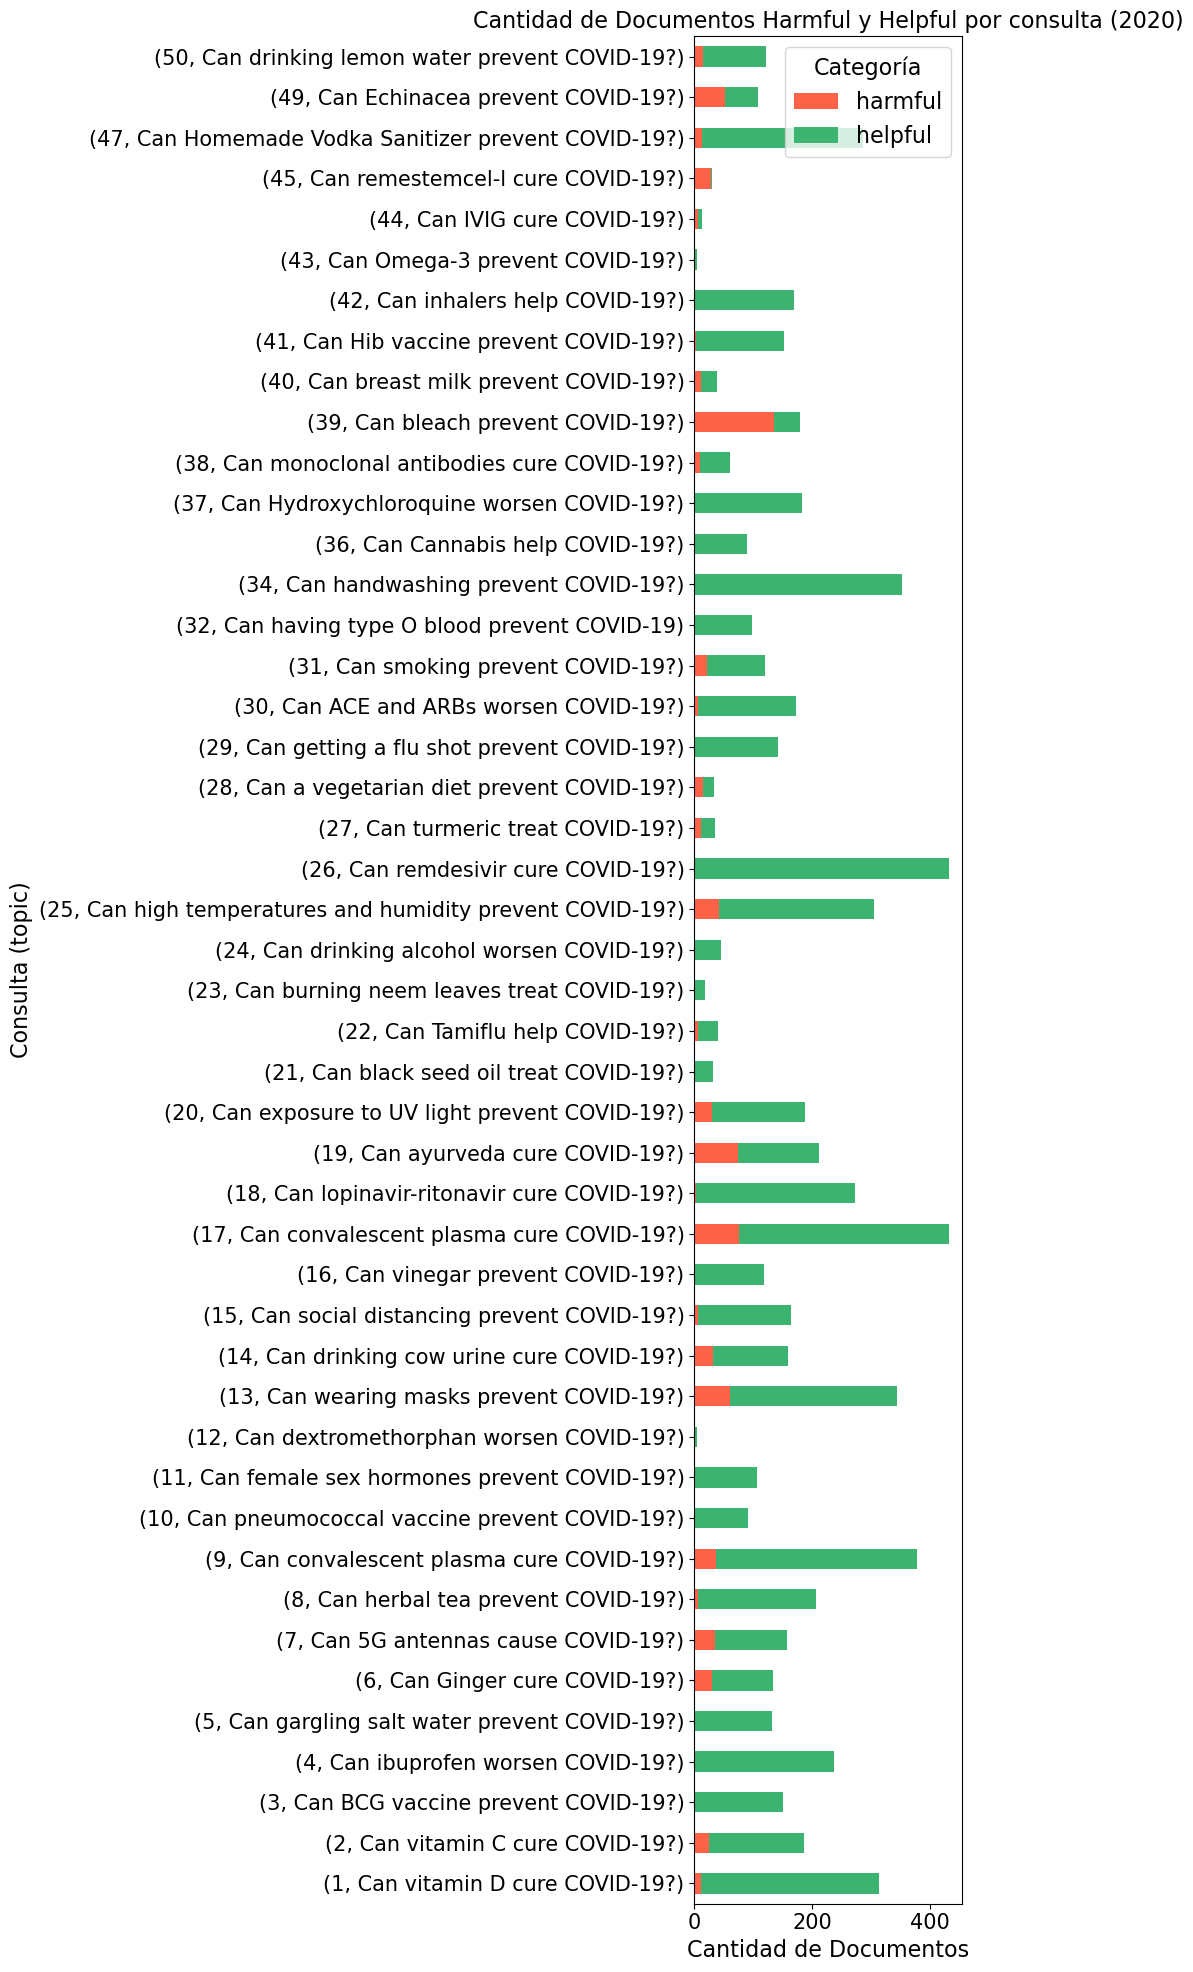

In [300]:
plt.figure(figsize=(10, 20))  # ancho x alto para vertical
conteo.plot(kind="barh", stacked=True, color=["tomato", "mediumseagreen"], figsize=(10, 20))
plt.ylabel("Consulta (topic)")
plt.xlabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Harmful y Helpful por consulta (2020)")
plt.legend(title="Categoría")

plt.tight_layout()
plt.show()

<Figure size 1000x2000 with 0 Axes>

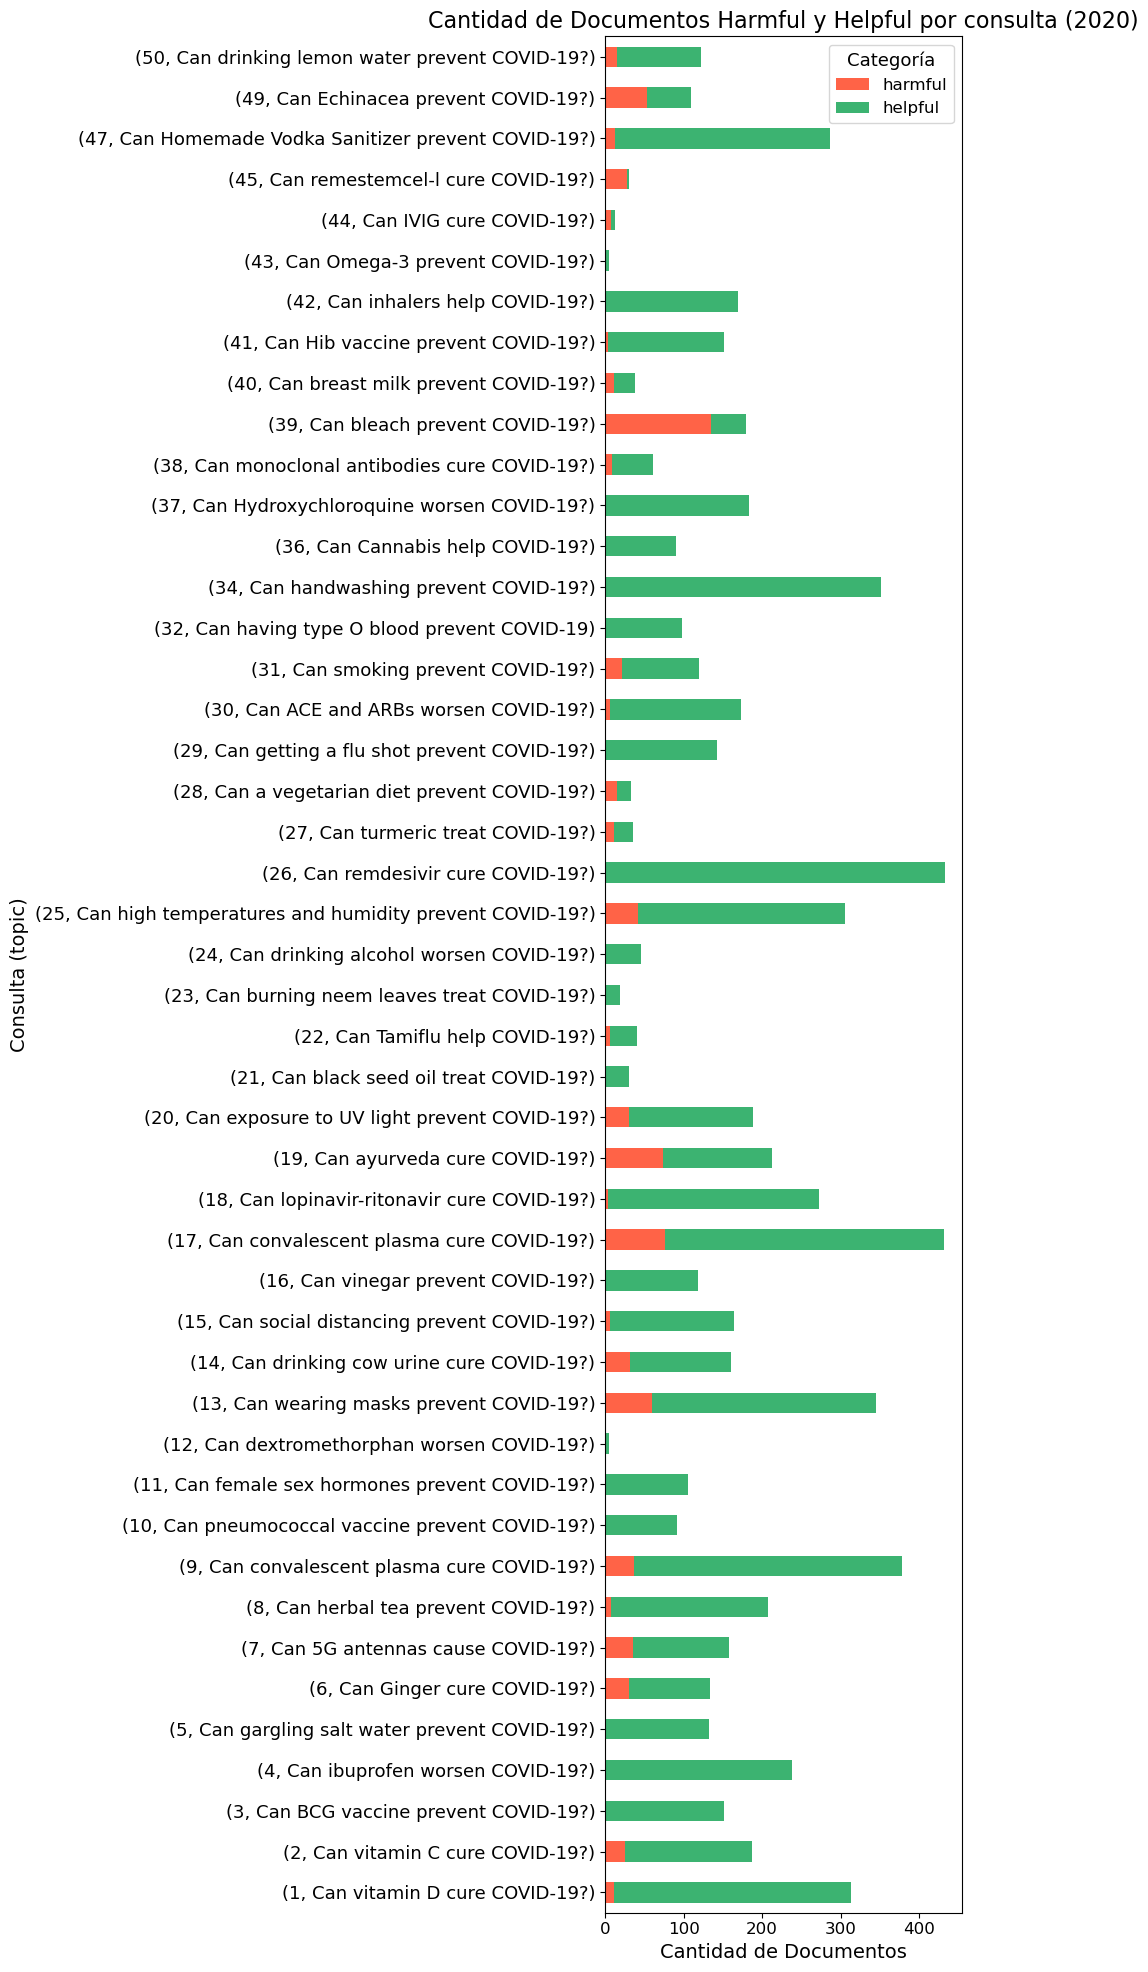

In [301]:
plt.figure(figsize=(10, 20))  # ancho x alto
ax = conteo.plot(
    kind="barh",
    stacked=True,
    color=["tomato", "mediumseagreen"],
    figsize=(10, 20),
)

plt.ylabel("Consulta (topic)", fontsize=14)
plt.xlabel("Cantidad de Documentos", fontsize=14)
plt.title("Cantidad de Documentos Harmful y Helpful por consulta (2020)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)  # aumentado aquí
plt.legend(title="Categoría", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

Vemos como, en general, la cantidad de documentos Helpful es superior a la de documentos Harmful

## Topics con más documentos Harmful

In [302]:
# Agrupamos por la pregunta y sumamos los valores. Para manejar los duplicados del topic 17 y 9
conteo_grouped = conteo.groupby("question").sum()

conteo_sort_harmful = conteo_grouped.sort_values(by="harmful", ascending=False).head(10)
conteo_sort_helpful = conteo_grouped.sort_values(by="helpful", ascending=False).head(10) 

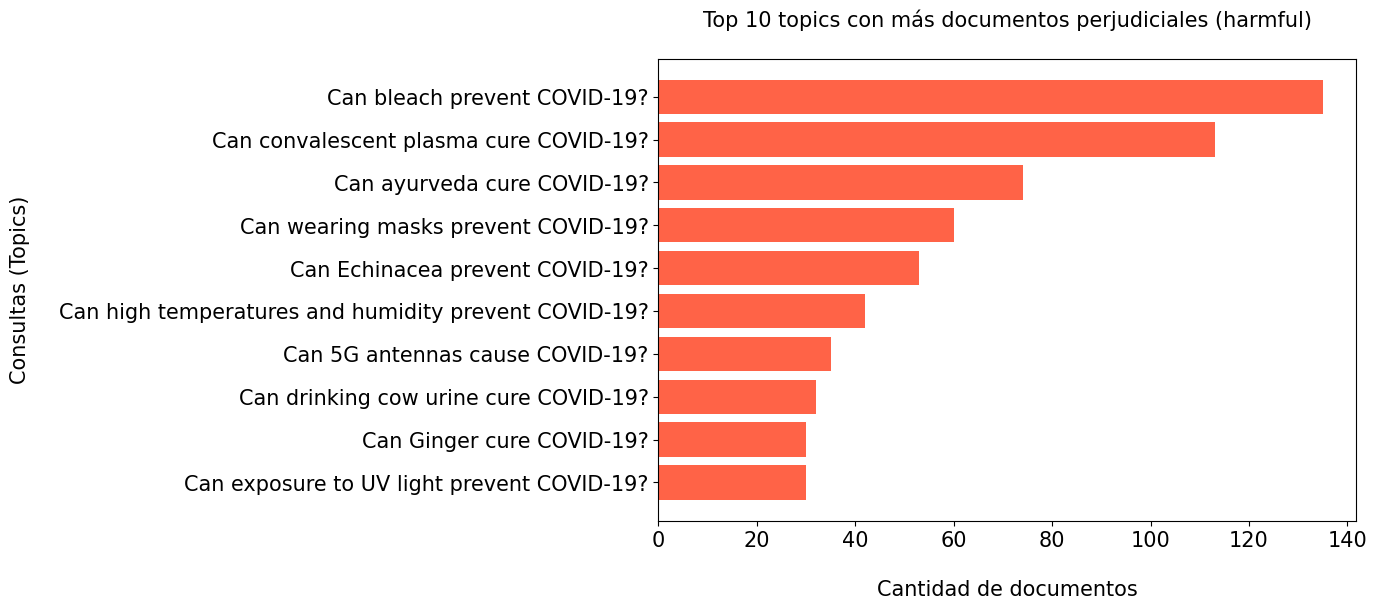

In [303]:
# Topics con más docus harmful

plt.figure(figsize=(9, 6))
plt.barh(conteo_sort_harmful.index, conteo_sort_harmful["harmful"], color="tomato")
plt.xlabel("\nCantidad de documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.title("Top 10 topics con más documentos perjudiciales (harmful)\n", fontsize=15)
plt.gca().invert_yaxis()

plt.show()

### Comparativa con documentos Helpful

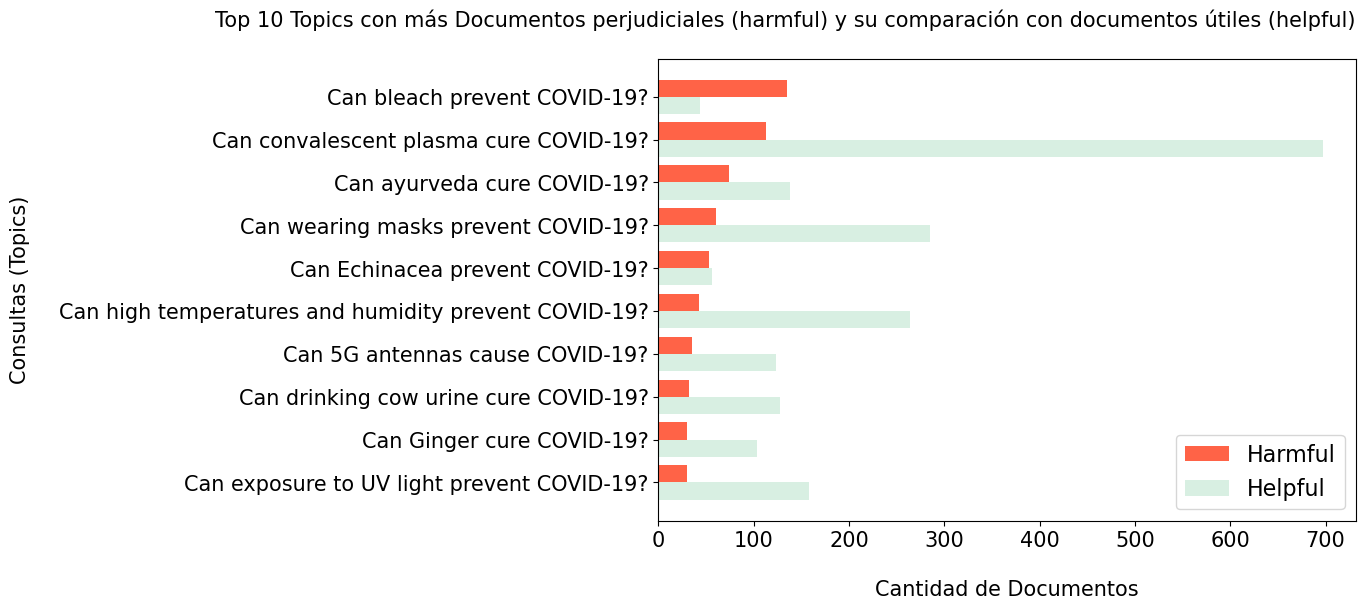

In [304]:
plt.figure(figsize=(9, 6))

y = range(len(conteo_sort_harmful))  # Cambiado a conteo_sort_harmful
bar_width = 0.4

# harmful (rojo)
plt.barh(y, conteo_sort_harmful["harmful"], color="tomato", label="Harmful", height=bar_width)

# helpful (verde), desplazado un poco hacia abajo
plt.barh([i + bar_width for i in y], conteo_sort_harmful["helpful"], color="mediumseagreen", alpha=0.2, label="Helpful", height=bar_width)

plt.xlabel("\nCantidad de Documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.title("Top 10 Topics con más Documentos perjudiciales (harmful) y su comparación con documentos útiles (helpful)\n", fontsize=15, loc='right')
plt.yticks([i + bar_width / 2 for i in y], conteo_sort_harmful.index)  # Cambiado a conteo_sort_harmful
plt.legend()
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.gca().invert_yaxis()

plt.show()

Comparando los topics con más documentos "harmful" con la cantidad de documentos "helpful", podemos observar si los topics más problemáticos también tienen una cantidad significativa de información útil. Esto es importante para entender si la información útil está contrarrestando efectivamente la desinformación.

En el primer caso "Puede la legía prevenir el COVID" vemos como no es el caso, ya que los documentos Harmful superan en más de la mitad a los documentos Helpful, por lo tanto es un tema muy dañino.

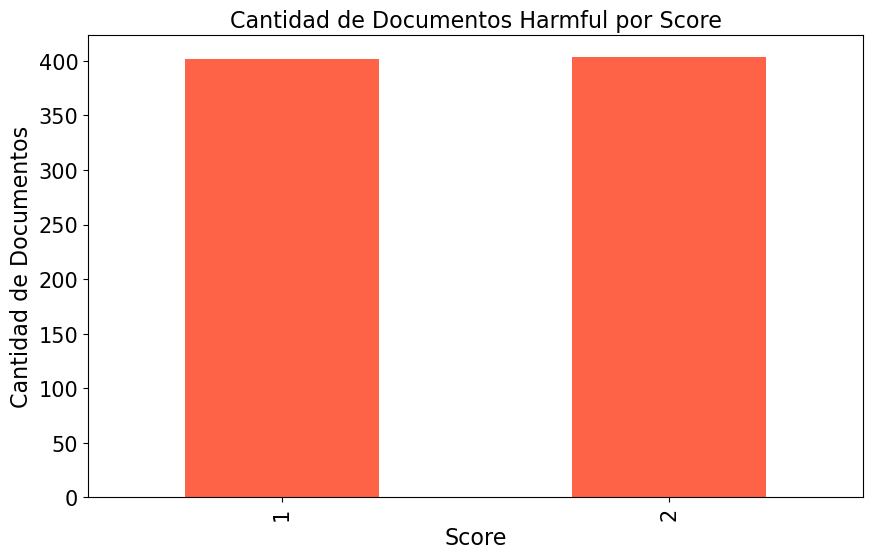

In [305]:
harmful_score = qrels_2020_harmful["score"].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
harmful_score.plot(kind="bar", color="tomato")
plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Harmful por Score")
plt.show()

## Topics con más documentos Helpful

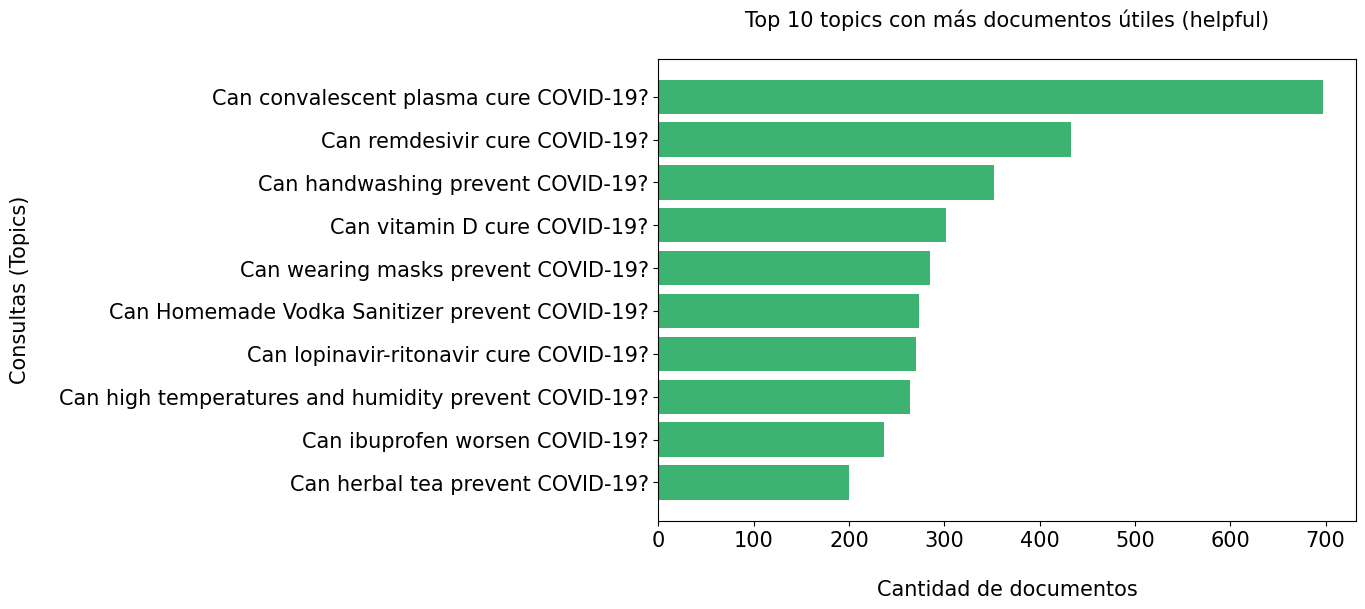

In [306]:
# Topics con más docus helpful
plt.figure(figsize=(9, 6))
plt.barh(conteo_sort_helpful.index, conteo_sort_helpful["helpful"], color="mediumseagreen")
plt.xlabel("\nCantidad de documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.title("Top 10 topics con más documentos útiles (helpful)\n", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

### Comparativa con documentos Harmful

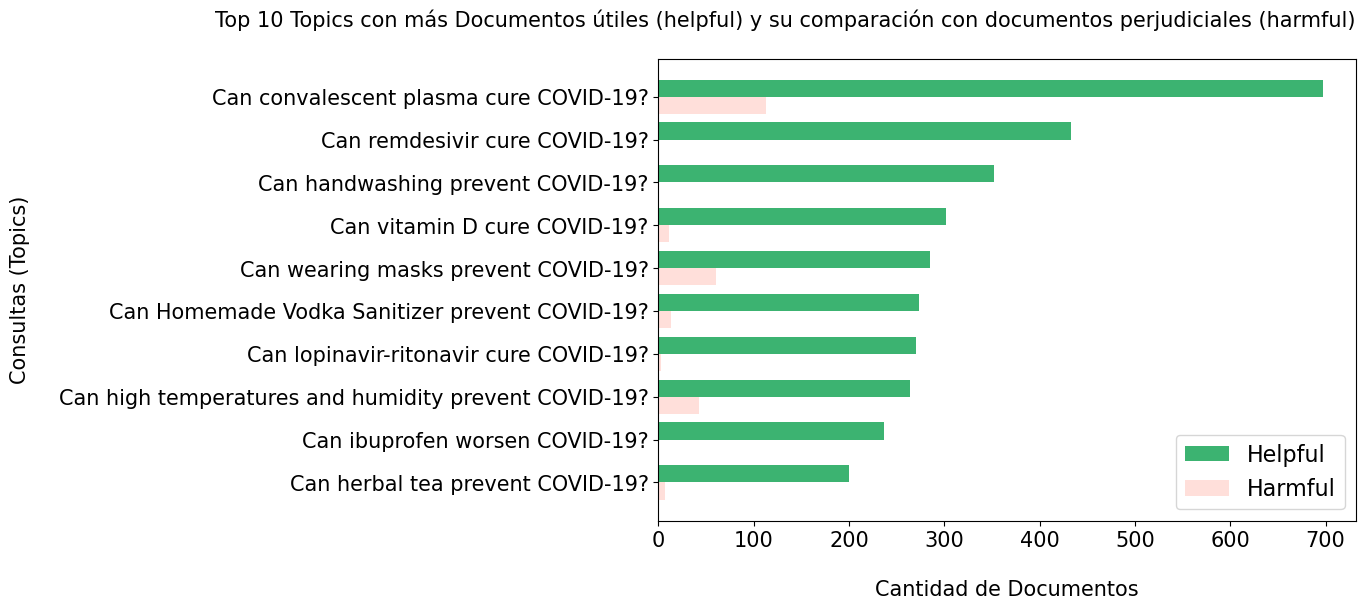

In [307]:
plt.figure(figsize=(9, 6))

y = range(len(conteo_sort_helpful))
bar_width = 0.4

# helpful (green)
plt.barh(y, conteo_sort_helpful["helpful"], color="mediumseagreen", label="Helpful", height=bar_width)

# harmful (red), desplazado un poco hacia abajo
plt.barh([i + bar_width for i in y], conteo_sort_helpful["harmful"], color="tomato", alpha=0.2, label="Harmful", height=bar_width)

plt.xlabel("\nCantidad de Documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.title("Top 10 Topics con más Documentos útiles (helpful) y su comparación con documentos perjudiciales (harmful)\n", fontsize=15, loc='right')
plt.yticks([i + bar_width / 2 for i in y], conteo_sort_helpful.index)
plt.legend()
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.gca().invert_yaxis()

plt.show()

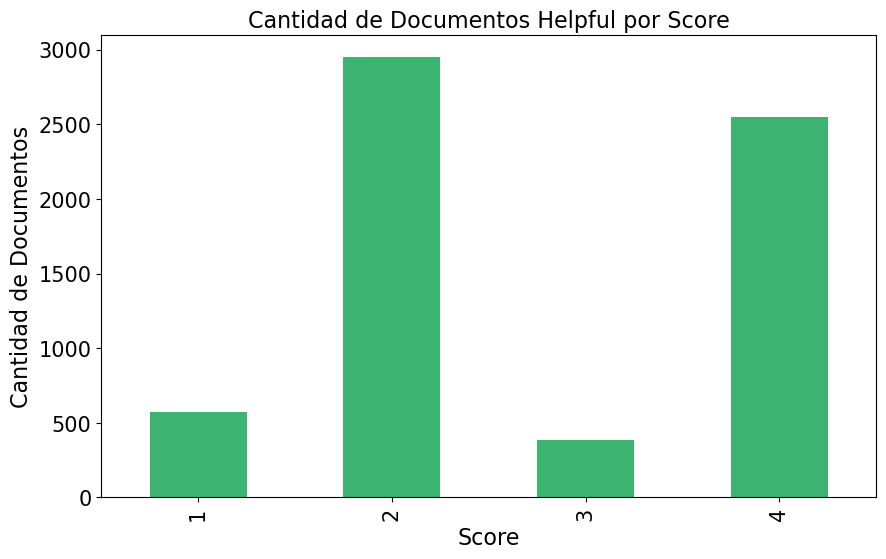

In [308]:
# Contar la cantidad de documentos helpful por cada grado
helpful_grade = qrels_2020_helpful["score"].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
helpful_grade.plot(kind="bar", color="mediumseagreen")
plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Helpful por Score")
plt.show()

## Cantidad de documentos Helpful y Harmful por Score

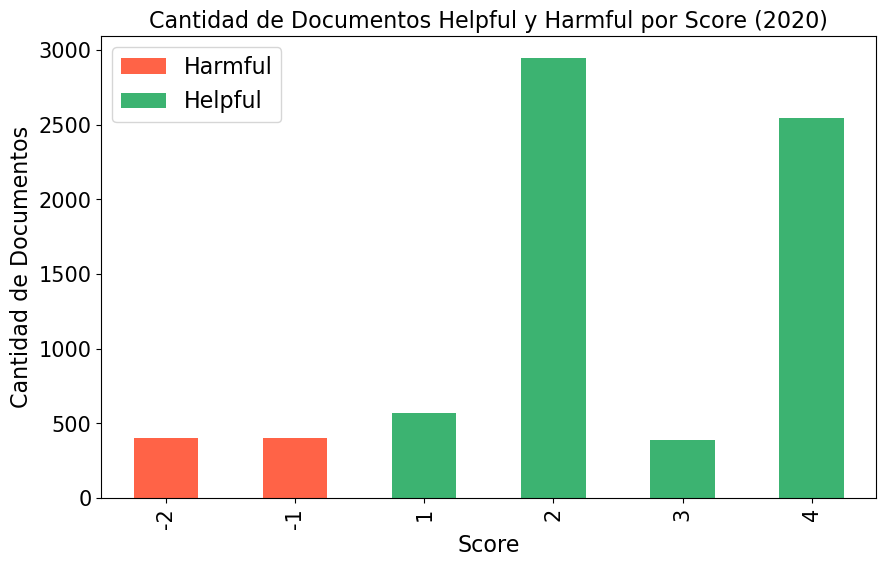

In [309]:
from matplotlib.patches import Patch

qrels_2020_allscores = qrels_2020

qrels_2020_allscores.loc[qrels_2020_allscores["category"] == "harmful", "score"] *= -1

score_counts = qrels_2020_allscores["score"].value_counts().sort_index()

# Asignar colores: rojo para harmful, verde para helpful
colors = ["tomato" if score < 0 else "mediumseagreen" for score in score_counts.index]

plt.figure(figsize=(10, 6))
score_counts.plot(kind="bar", color=colors)

plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Helpful y Harmful por Score (2020)")

# Crear leyenda manual
legend_elements = [
    Patch(facecolor='tomato', label='Harmful'),
    Patch(facecolor='mediumseagreen', label='Helpful')
]
plt.legend(handles=legend_elements)

plt.show()

# 2021

In [310]:
qrels_2021_harmful

,topic,iter,docno,score
0,101,0,en.noclean.c4-train.00005-of-07168.143426,1
1,101,0,en.noclean.c4-train.00044-of-07168.58816,1
2,101,0,en.noclean.c4-train.00173-of-07168.139550,2
3,101,0,en.noclean.c4-train.00263-of-07168.86388,1
4,101,0,en.noclean.c4-train.00285-of-07168.127397,3
...,...,...,...,...
1591,143,0,en.noclean.c4-train.06818-of-07168.1741,1
1592,144,0,en.noclean.c4-train.03108-of-07168.93040,2
1593,146,0,en.noclean.c4-train.04772-of-07168.84155,2
1594,149,0,en.noclean.c4-train.04196-of-07168.126836,2


In [311]:
qrels_2021_helpful

,topic,iter,docno,score
0,101,0,en.noclean.c4-train.00119-of-07168.41683,3
1,101,0,en.noclean.c4-train.00158-of-07168.6219,1
2,101,0,en.noclean.c4-train.00365-of-07168.34369,3
3,101,0,en.noclean.c4-train.00416-of-07168.113456,5
4,101,0,en.noclean.c4-train.00444-of-07168.126346,1
...,...,...,...,...
4868,149,0,en.noclean.c4-train.06963-of-07168.68577,3
4869,149,0,en.noclean.c4-train.06970-of-07168.10990,9
4870,149,0,en.noclean.c4-train.06997-of-07168.18731,10
4871,149,0,en.noclean.c4-train.07121-of-07168.132517,9


In [312]:
print('HARMFUL 2021')
print(qrels_2021_harmful["score"].value_counts())

print('\nHELPFUL 2021')
print(qrels_2021_helpful["score"].value_counts())

HARMFUL 2021
score
2    722
1    679
3    195
Name: count, dtype: int64

HELPFUL 2021
score
3     897
10    825
9     763
1     697
7     629
8     417
12    172
11    154
4     132
5      94
2      56
6      37
Name: count, dtype: int64


Podemos apreciar como los 'scores' cambian en comparación con el año 2020. 

In [313]:
qrels_2021_harmful["category"] = "harmful"
qrels_2021_helpful["category"] = "helpful"
qrels_2021_helpful

,topic,iter,docno,score,category
0,101,0,en.noclean.c4-train.00119-of-07168.41683,3,helpful
1,101,0,en.noclean.c4-train.00158-of-07168.6219,1,helpful
2,101,0,en.noclean.c4-train.00365-of-07168.34369,3,helpful
3,101,0,en.noclean.c4-train.00416-of-07168.113456,5,helpful
4,101,0,en.noclean.c4-train.00444-of-07168.126346,1,helpful
...,...,...,...,...,...
4868,149,0,en.noclean.c4-train.06963-of-07168.68577,3,helpful
4869,149,0,en.noclean.c4-train.06970-of-07168.10990,9,helpful
4870,149,0,en.noclean.c4-train.06997-of-07168.18731,10,helpful
4871,149,0,en.noclean.c4-train.07121-of-07168.132517,9,helpful


In [314]:
qrels_2021 = pd.concat([qrels_2021_harmful, qrels_2021_helpful], ignore_index=True)
qrels_2021 = qrels_2021.drop(columns=["iter"])
qrels_2021

,topic,docno,score,category
0,101,en.noclean.c4-train.00005-of-07168.143426,1,harmful
1,101,en.noclean.c4-train.00044-of-07168.58816,1,harmful
2,101,en.noclean.c4-train.00173-of-07168.139550,2,harmful
3,101,en.noclean.c4-train.00263-of-07168.86388,1,harmful
4,101,en.noclean.c4-train.00285-of-07168.127397,3,harmful
...,...,...,...,...
6464,149,en.noclean.c4-train.06963-of-07168.68577,3,helpful
6465,149,en.noclean.c4-train.06970-of-07168.10990,9,helpful
6466,149,en.noclean.c4-train.06997-of-07168.18731,10,helpful
6467,149,en.noclean.c4-train.07121-of-07168.132517,9,helpful


In [315]:
topics_2021 = topics_2021.rename(columns={"number": "topic"})
topics_2021 = topics_2021.rename(columns={"description": "question"})
topics_2021 = topics_2021.rename(columns={"title": "query"})
topics_2021.head(5)

,topic,query,question,narrative,disclaimer,stance,evidence
0,101,ankle brace achilles tendonitis,Will wearing an ankle brace help heal achilles...,Achilles tendonitis is a condition where one e...,We do not claim to be providing medical advice...,unhelpful,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,102,tepid sponge bath reduce fever children,Is a tepid sponge bath a good way to reduce fe...,Fever can boost the immune system and therefor...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/9115527/
2,103,folic acid dementia,Can folic acid help improve cognition and trea...,Dementia is a general term for loss of cogniti...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/14584018/
3,104,duct tape warts,Does duct tape work for wart removal?,Duct tape is a plastic and cloth backed adhesi...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/22972052/
4,105,put ice on a burn,Should I apply ice to a burn?,Many people commonly put on ice on burns in an...,We do not claim to be providing medical advice...,unhelpful,https://www.uwhealth.org/news/the-right-way-to...


In [316]:
topics_2021

,topic,query,question,narrative,disclaimer,stance,evidence
0,101,ankle brace achilles tendonitis,Will wearing an ankle brace help heal achilles...,Achilles tendonitis is a condition where one e...,We do not claim to be providing medical advice...,unhelpful,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,102,tepid sponge bath reduce fever children,Is a tepid sponge bath a good way to reduce fe...,Fever can boost the immune system and therefor...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/9115527/
2,103,folic acid dementia,Can folic acid help improve cognition and trea...,Dementia is a general term for loss of cogniti...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/14584018/
3,104,duct tape warts,Does duct tape work for wart removal?,Duct tape is a plastic and cloth backed adhesi...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/22972052/
4,105,put ice on a burn,Should I apply ice to a burn?,Many people commonly put on ice on burns in an...,We do not claim to be providing medical advice...,unhelpful,https://www.uwhealth.org/news/the-right-way-to...
5,106,vitamin b12 sun exposure vitiligo,Can vitamin b12 and sun exposure together help...,Vitiligo is characterized by discolored patche...,We do not claim to be providing medical advice...,helpful,https://pubmed.ncbi.nlm.nih.gov/9394983/
6,107,yoga asthma,Does yoga improve the management of asthma?,Asthma is a condition that causes shortness of...,We do not claim to be providing medical advice...,helpful,https://pubmed.ncbi.nlm.nih.gov/27115477/
7,108,"starve a fever, feed a cold",Is starving a fever effective?,A fever is an increase in body temperature due...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/25688968/
8,109,selenium cancer,Does selenium help prevent cancer?,Selenium supplements are claimed to help preve...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/29376219/
9,110,birth control pill ovarian cysts treatment,Will taking birth control pills treat an ovari...,Functional ovarian cysts are a common gynecolo...,We do not claim to be providing medical advice...,unhelpful,https://pubmed.ncbi.nlm.nih.gov/24782304/


In [317]:
qrels_2021 = qrels_2021.merge(topics_2021, on="topic", how="left")
qrels_2021.head(5)

,topic,docno,score,category,query,question,narrative,disclaimer,stance,evidence
0,101,en.noclean.c4-train.00005-of-07168.143426,1,harmful,ankle brace achilles tendonitis,Will wearing an ankle brace help heal achilles...,Achilles tendonitis is a condition where one e...,We do not claim to be providing medical advice...,unhelpful,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,101,en.noclean.c4-train.00044-of-07168.58816,1,harmful,ankle brace achilles tendonitis,Will wearing an ankle brace help heal achilles...,Achilles tendonitis is a condition where one e...,We do not claim to be providing medical advice...,unhelpful,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
2,101,en.noclean.c4-train.00173-of-07168.139550,2,harmful,ankle brace achilles tendonitis,Will wearing an ankle brace help heal achilles...,Achilles tendonitis is a condition where one e...,We do not claim to be providing medical advice...,unhelpful,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
3,101,en.noclean.c4-train.00263-of-07168.86388,1,harmful,ankle brace achilles tendonitis,Will wearing an ankle brace help heal achilles...,Achilles tendonitis is a condition where one e...,We do not claim to be providing medical advice...,unhelpful,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
4,101,en.noclean.c4-train.00285-of-07168.127397,3,harmful,ankle brace achilles tendonitis,Will wearing an ankle brace help heal achilles...,Achilles tendonitis is a condition where one e...,We do not claim to be providing medical advice...,unhelpful,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...


In [318]:
# Total de filas
total_qrels_2021 = len(qrels_2021)

# Total por categoría
category_counts_2021 = qrels_2021["category"].value_counts()

# Crear DataFrame con totales y porcentajes
summary_2021 = pd.DataFrame({
    "total": [total_qrels_2021, total_qrels_2021],
    "cantidad": [category_counts_2021.get("harmful", 0), category_counts_2021.get("helpful", 0)],
    "porcentaje": [
        f"{(category_counts_2021.get('harmful', 0) / total_qrels_2021 * 100):.1f}%",
        f"{(category_counts_2021.get('helpful', 0) / total_qrels_2021 * 100):.1f}%"
    ]
}, index=["harmful", "helpful"])

# Mostrar el resumen
print("\nResumen de documentos 2021:")
print("=" * 50)
print(f"Total de documentos: {total_qrels_2021}")
print("\nDistribución por categoría:")
print(summary_2021)


Resumen de documentos 2021:
Total de documentos: 6469

Distribución por categoría:
         total  cantidad porcentaje
harmful   6469      1596      24.7%
helpful   6469      4873      75.3%


## Cantidad de documentos Harmful y Helpful por topic

In [319]:
# Contar el número de documentos harmful y helpful por topic
conteo = qrels_2021.groupby(["topic", "question", "category"]).size().unstack(fill_value=0)
conteo

,category,harmful,helpful
topic,question,,
101,Will wearing an ankle brace help heal achilles tendonitis?,163,57
102,Is a tepid sponge bath a good way to reduce fever in children?,150,73
103,Can folic acid help improve cognition and treat dementia?,139,52
104,Does duct tape work for wart removal?,151,35
105,Should I apply ice to a burn?,57,191
106,Can vitamin b12 and sun exposure together help treat vitiligo?,1,65
107,Does yoga improve the management of asthma?,12,145
108,Is starving a fever effective?,17,97
109,Does selenium help prevent cancer?,53,183


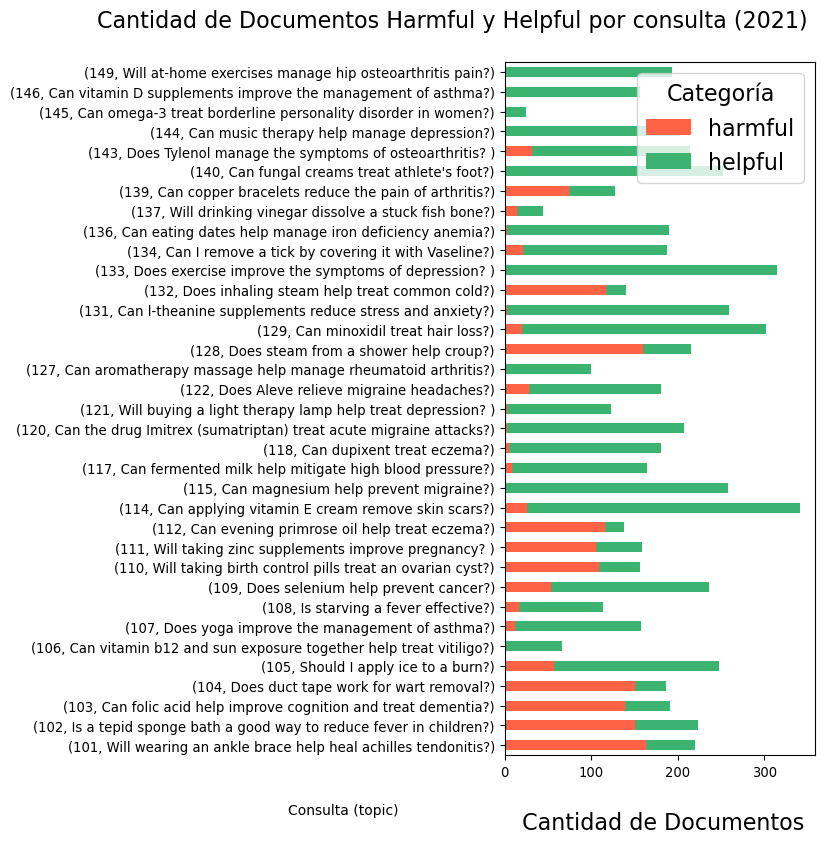

In [320]:
conteo.plot(kind="barh", stacked=True, color=["tomato", "mediumseagreen"], figsize=(4, 9))
plt.xlabel("\n Cantidad de Documentos")
plt.ylabel("")
plt.title("Cantidad de Documentos Harmful y Helpful por consulta (2021) \n", loc='right')
plt.legend(title="Categoría")
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.text(-250, -3.5, "Consulta (topic)", fontsize=10, rotation=0)

plt.show()

#SELECCIONADO

En comparación con el año 2020, la proporción de documentos Harmful frente a Helpful aumenta.

In [321]:
# Agrupamos por la pregunta y sumamos los valores. Por si hubiera duplicados.
conteo_grouped = conteo.groupby("question").sum().reset_index()

conteo_sort_harmful = conteo_grouped.sort_values(by="harmful", ascending=False).head(10)
conteo_sort_helpful = conteo_grouped.sort_values(by="helpful", ascending=False).head(10) 

## Topics con más documentos Harmful

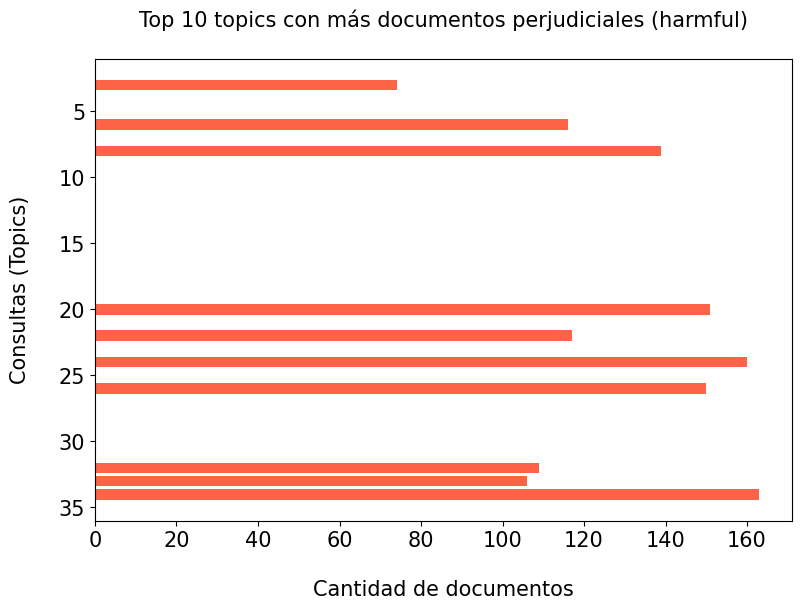

In [322]:
# Topics con más docus harmful

plt.figure(figsize=(9, 6))
plt.barh(conteo_sort_harmful.index, conteo_sort_harmful["harmful"], color="tomato")
plt.xlabel("\nCantidad de documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.title("Top 10 topics con más documentos perjudiciales (harmful)\n", fontsize=15)
plt.gca().invert_yaxis()

plt.show()

### Comparativa con documentos Helpful

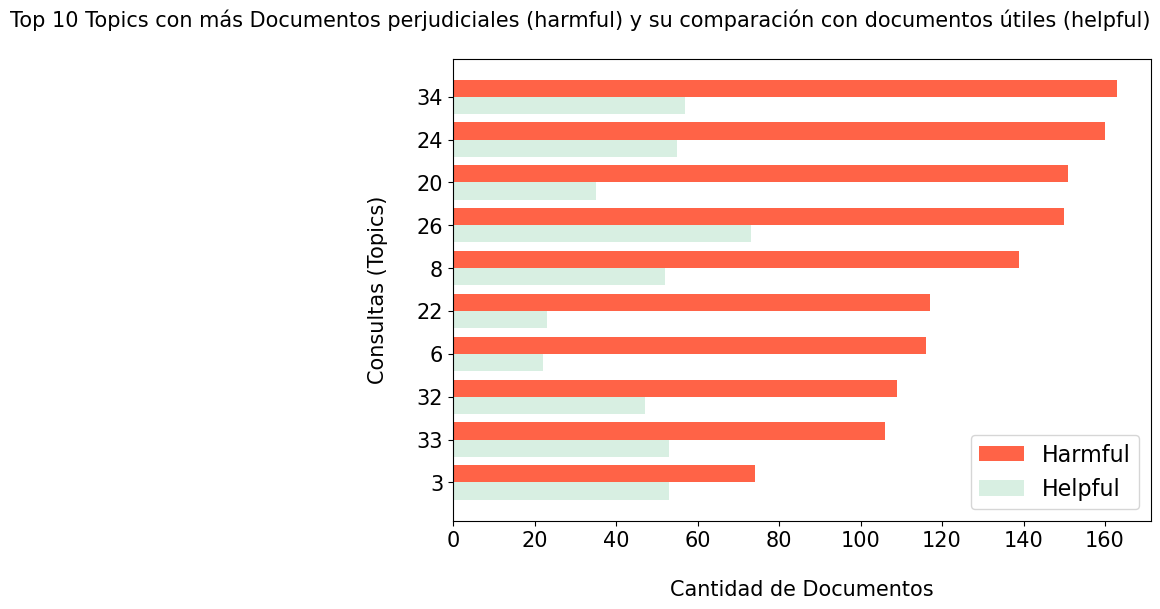

In [323]:
plt.figure(figsize=(9, 6))

y = range(len(conteo_sort_harmful))  # Cambiado a conteo_sort_harmful
bar_width = 0.4

# harmful (rojo)
plt.barh(y, conteo_sort_harmful["harmful"], color="tomato", label="Harmful", height=bar_width)

# helpful (verde), desplazado un poco hacia abajo
plt.barh([i + bar_width for i in y], conteo_sort_harmful["helpful"], color="mediumseagreen", alpha=0.2, label="Helpful", height=bar_width)

plt.xlabel("\nCantidad de Documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.title("Top 10 Topics con más Documentos perjudiciales (harmful) y su comparación con documentos útiles (helpful)\n", fontsize=15, loc='right')
plt.yticks([i + bar_width / 2 for i in y], conteo_sort_harmful.index)  # Cambiado a conteo_sort_harmful
plt.legend()
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.gca().invert_yaxis()

plt.show()

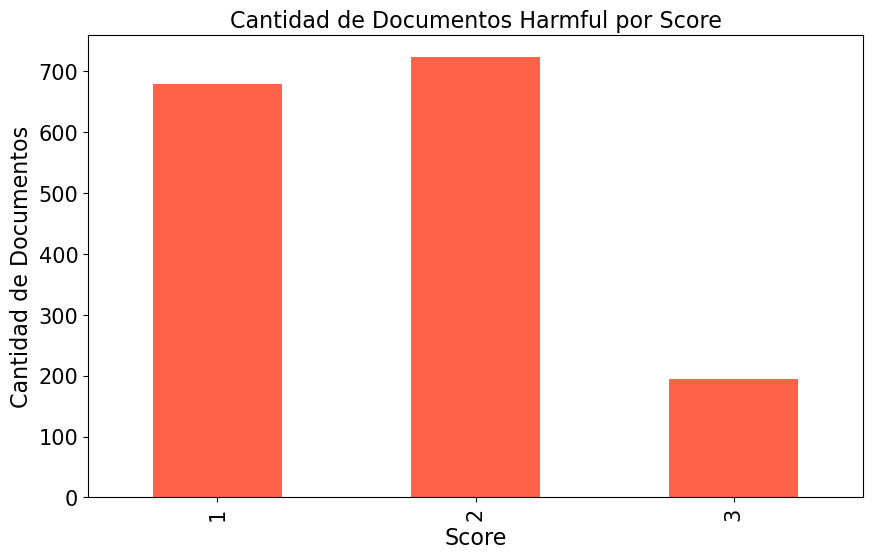

In [324]:
harmful_scores = qrels_2021_harmful["score"].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
harmful_scores.plot(kind="bar", color="tomato")
plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Harmful por Score")
plt.show()

## Topics con más documentos Helpful

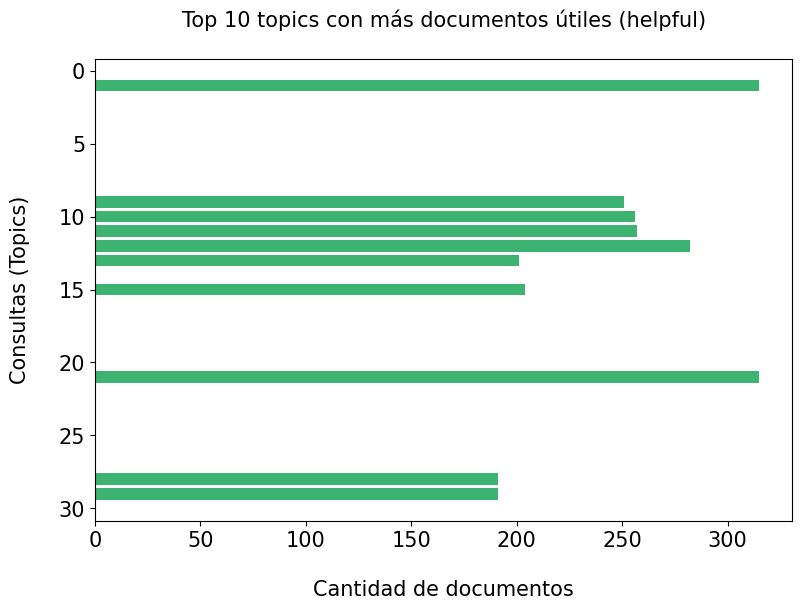

In [325]:
# Topics con más docus helpful
plt.figure(figsize=(9, 6))
plt.barh(conteo_sort_helpful.index, conteo_sort_helpful["helpful"], color="mediumseagreen")
plt.xlabel("\nCantidad de documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.title("Top 10 topics con más documentos útiles (helpful)\n", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

### Comparativa con documentos Harmful

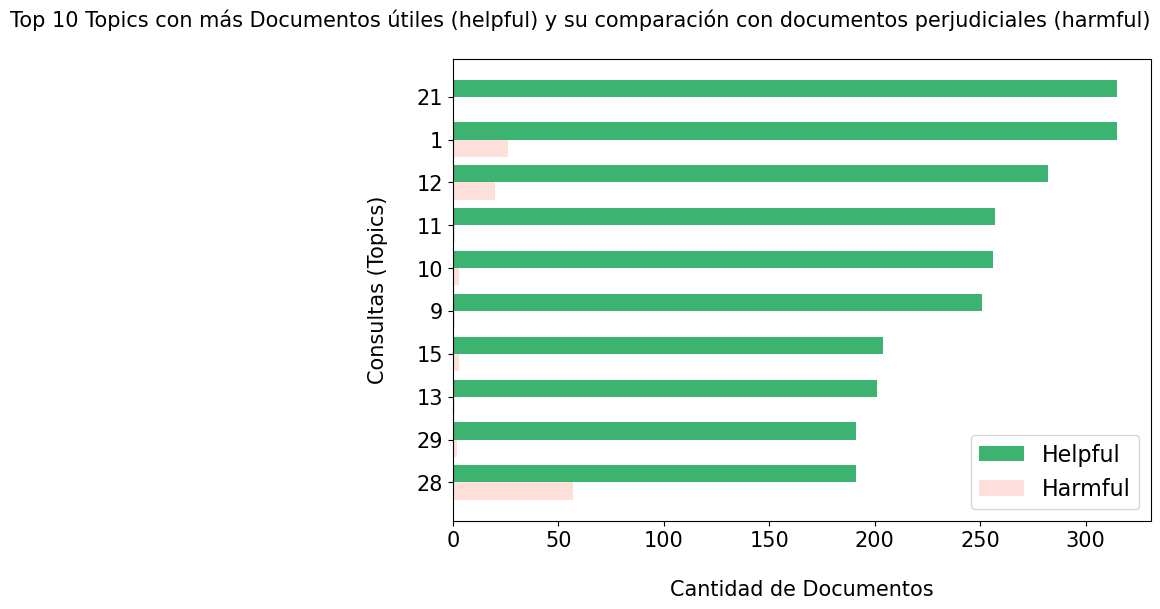

In [326]:
plt.figure(figsize=(9, 6))

y = range(len(conteo_sort_helpful))
bar_width = 0.4

# helpful (green)
plt.barh(y, conteo_sort_helpful["helpful"], color="mediumseagreen", label="Helpful", height=bar_width)

# harmful (red), desplazado un poco hacia abajo
plt.barh([i + bar_width for i in y], conteo_sort_helpful["harmful"], color="tomato", alpha=0.2, label="Harmful", height=bar_width)

plt.xlabel("\nCantidad de Documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.title("Top 10 Topics con más Documentos útiles (helpful) y su comparación con documentos perjudiciales (harmful)\n", fontsize=15, loc='right')
plt.yticks([i + bar_width / 2 for i in y], conteo_sort_helpful.index)
plt.legend()
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.gca().invert_yaxis()

plt.show()

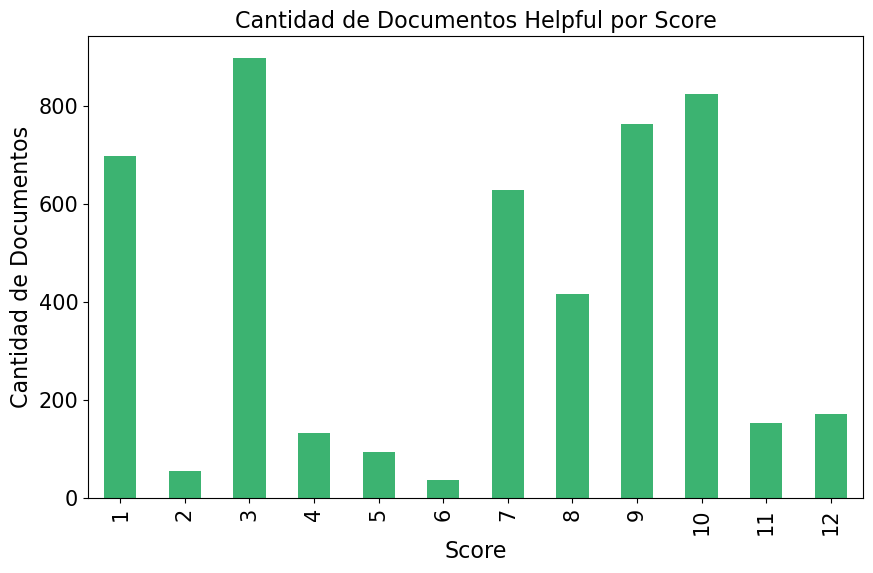

In [327]:
# Contar la cantidad de documentos helpful por cada grado
helpful_score = qrels_2021_helpful["score"].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
helpful_score.plot(kind="bar", color="mediumseagreen")
plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Helpful por Score")
plt.show()

## Cantidad de documentos Helpful y Harmful por Score

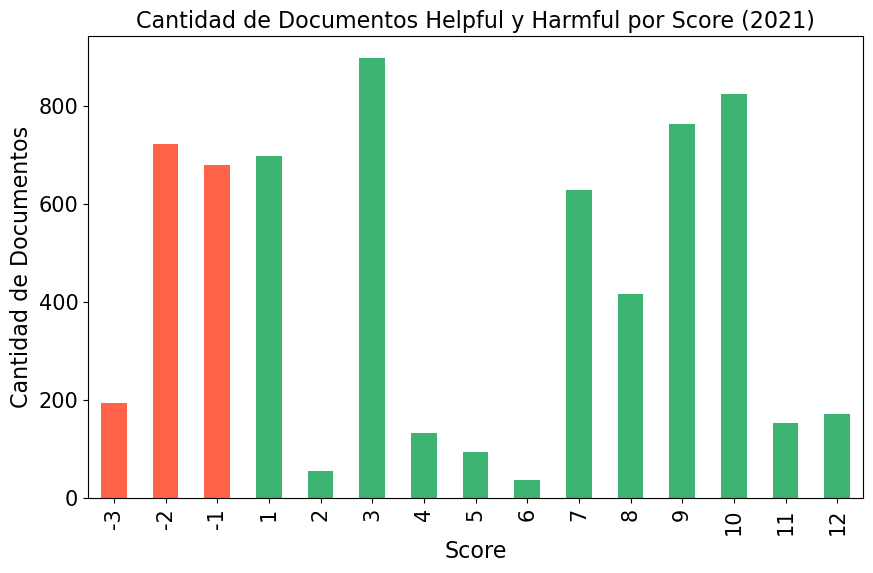

In [328]:
qrels_2021_allscores = qrels_2021

qrels_2021_allscores.loc[qrels_2021_allscores["category"] == "harmful", "score"] *= -1

score_counts = qrels_2021_allscores["score"].value_counts().sort_index()

# Asignar colores: rojo para harmful, verde para helpful
colors = ["tomato" if score < 0 else "mediumseagreen" for score in score_counts.index]

plt.figure(figsize=(10, 6))
score_counts.plot(kind="bar", color=colors)

plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Helpful y Harmful por Score (2021)")

plt.show()

# 2022

In [329]:
qrels_2022_harmful

,topic,iter,docno,score
0,151,0,en.noclean.c4-train.00884-of-07168.53989,1
1,151,0,en.noclean.c4-train.00920-of-07168.36718,1
2,151,0,en.noclean.c4-train.00945-of-07168.98682,1
3,151,0,en.noclean.c4-train.01555-of-07168.2467,1
4,151,0,en.noclean.c4-train.01615-of-07168.94520,1
...,...,...,...,...
1429,197,0,en.noclean.c4-train.07108-of-07168.83628,1
1430,197,0,en.noclean.c4-train.07164-of-07168.25864,1
1431,197,0,en.noclean.c4-train.02156-of-07168.9053,2
1432,199,0,en.noclean.c4-train.00136-of-07168.87027,1


In [330]:
qrels_2022_helpful

,topic,iter,docno,score
0,151,0,en.noclean.c4-train.02455-of-07168.38462,7
1,151,0,en.noclean.c4-train.05377-of-07168.60016,7
2,151,0,en.noclean.c4-train.00058-of-07168.67073,6
3,151,0,en.noclean.c4-train.01484-of-07168.132100,6
4,151,0,en.noclean.c4-train.04490-of-07168.146221,6
...,...,...,...,...
5062,200,0,en.noclean.c4-train.06874-of-07168.93586,3
5063,200,0,en.noclean.c4-train.06998-of-07168.65059,3
5064,200,0,en.noclean.c4-train.07098-of-07168.131496,3
5065,200,0,en.noclean.c4-train.03733-of-07168.87260,1


In [331]:
print('HARMFUL 2022')
print(qrels_2022_harmful["score"].value_counts())

print('\nHELPFUL 2022')
print(qrels_2022_helpful["score"].value_counts())

HARMFUL 2022
score
1    1236
2     198
Name: count, dtype: int64

HELPFUL 2022
score
3     3087
1      875
4      573
5      165
2      107
6       72
7       53
8       42
10      27
9       26
11      18
12      15
13       4
14       3
Name: count, dtype: int64


In [332]:
qrels_2022_harmful["category"] = "harmful"
qrels_2022_helpful["category"] = "helpful"
qrels_2022_helpful

,topic,iter,docno,score,category
0,151,0,en.noclean.c4-train.02455-of-07168.38462,7,helpful
1,151,0,en.noclean.c4-train.05377-of-07168.60016,7,helpful
2,151,0,en.noclean.c4-train.00058-of-07168.67073,6,helpful
3,151,0,en.noclean.c4-train.01484-of-07168.132100,6,helpful
4,151,0,en.noclean.c4-train.04490-of-07168.146221,6,helpful
...,...,...,...,...,...
5062,200,0,en.noclean.c4-train.06874-of-07168.93586,3,helpful
5063,200,0,en.noclean.c4-train.06998-of-07168.65059,3,helpful
5064,200,0,en.noclean.c4-train.07098-of-07168.131496,3,helpful
5065,200,0,en.noclean.c4-train.03733-of-07168.87260,1,helpful


In [333]:
qrels_2022 = pd.concat([qrels_2022_harmful, qrels_2022_helpful], ignore_index=True)
qrels_2022 = qrels_2022.drop(columns=["iter"])
qrels_2022

,topic,docno,score,category
0,151,en.noclean.c4-train.00884-of-07168.53989,1,harmful
1,151,en.noclean.c4-train.00920-of-07168.36718,1,harmful
2,151,en.noclean.c4-train.00945-of-07168.98682,1,harmful
3,151,en.noclean.c4-train.01555-of-07168.2467,1,harmful
4,151,en.noclean.c4-train.01615-of-07168.94520,1,harmful
...,...,...,...,...
6496,200,en.noclean.c4-train.06874-of-07168.93586,3,helpful
6497,200,en.noclean.c4-train.06998-of-07168.65059,3,helpful
6498,200,en.noclean.c4-train.07098-of-07168.131496,3,helpful
6499,200,en.noclean.c4-train.03733-of-07168.87260,1,helpful


In [334]:
topics_2022

,number,question,query,background,disclaimer,answer,evidence
0,151,Do tea bags help to clot blood in pulled teeth?,tea bags clot blood pulled teeth,Tea bags are small bags containing dried tea t...,We do not claim to be providing medical advice...,yes,https://www.webmd.com/oral-health/wisdom-teeth
1,152,Can crystals heal?,crystals heal,This question is asking if placing semipreciou...,We do not claim to be providing medical advice...,no,https://www.webmd.com/balance/news/20180116/ca...
2,153,Can collagen supplements cure osteoarthritis?,collagen supplements osteoarthritis,Osteoarthritis is a degenerative joint disease...,We do not claim to be providing medical advice...,no,https://link.springer.com/article/10.1007/s407...
3,154,Can cell phones cause cancer?,cell phone cancer,Cell phones emit radio waves (non-ionizing rad...,We do not claim to be providing medical advice...,no,https://www.cancer.gov/about-cancer/causes-pre...
4,155,Can you use WD-40 for arthritis?,WD-40 arthritis,WD-40 is an oil-based lubricant. Arthritis is ...,We do not claim to be providing medical advice...,no,https://wd40.co.uk/tips-and-tricks/can-wd-40-h...
5,156,Can mosquito bites make you sick?,mosquito bites sick,A mosquito is a flying insect that can punctur...,We do not claim to be providing medical advice...,yes,https://www.mayoclinic.org/diseases-conditions...
6,157,Can cancer be inherited?,cancer inherited,Cancer is a disease where cells in the body gr...,We do not claim to be providing medical advice...,yes,https://www.cancer.gov/about-cancer/causes-pre...
7,158,Are vaccines linked to autism?,vaccines autism,Vaccines provide protection from infectious di...,We do not claim to be providing medical advice...,no,https://pubmed.ncbi.nlm.nih.gov/24814559/
8,159,Can baking soda help to cure cancer?,baking soda cancer,Cancer is a disease where cells in the body gr...,We do not claim to be providing medical advice...,no,https://www.webmd.com/a-to-z-guides/baking-sod...
9,160,Are squats bad for knees?,squats knees,A squat is a strength exercise in which a pers...,We do not claim to be providing medical advice...,no,https://pubmed.ncbi.nlm.nih.gov/23821469/


In [335]:
topics_2022 = topics_2022.rename(columns={"number": "topic"})
topics_2022 = topics_2022.rename(columns={"background": "narrative"})
topics_2022.head(5)

,topic,question,query,narrative,disclaimer,answer,evidence
0,151,Do tea bags help to clot blood in pulled teeth?,tea bags clot blood pulled teeth,Tea bags are small bags containing dried tea t...,We do not claim to be providing medical advice...,yes,https://www.webmd.com/oral-health/wisdom-teeth
1,152,Can crystals heal?,crystals heal,This question is asking if placing semipreciou...,We do not claim to be providing medical advice...,no,https://www.webmd.com/balance/news/20180116/ca...
2,153,Can collagen supplements cure osteoarthritis?,collagen supplements osteoarthritis,Osteoarthritis is a degenerative joint disease...,We do not claim to be providing medical advice...,no,https://link.springer.com/article/10.1007/s407...
3,154,Can cell phones cause cancer?,cell phone cancer,Cell phones emit radio waves (non-ionizing rad...,We do not claim to be providing medical advice...,no,https://www.cancer.gov/about-cancer/causes-pre...
4,155,Can you use WD-40 for arthritis?,WD-40 arthritis,WD-40 is an oil-based lubricant. Arthritis is ...,We do not claim to be providing medical advice...,no,https://wd40.co.uk/tips-and-tricks/can-wd-40-h...


In [336]:
qrels_2022 = qrels_2022.merge(topics_2022, on="topic", how="left")
qrels_2022.head(5)

,topic,docno,score,category,question,query,narrative,disclaimer,answer,evidence
0,151,en.noclean.c4-train.00884-of-07168.53989,1,harmful,Do tea bags help to clot blood in pulled teeth?,tea bags clot blood pulled teeth,Tea bags are small bags containing dried tea t...,We do not claim to be providing medical advice...,yes,https://www.webmd.com/oral-health/wisdom-teeth
1,151,en.noclean.c4-train.00920-of-07168.36718,1,harmful,Do tea bags help to clot blood in pulled teeth?,tea bags clot blood pulled teeth,Tea bags are small bags containing dried tea t...,We do not claim to be providing medical advice...,yes,https://www.webmd.com/oral-health/wisdom-teeth
2,151,en.noclean.c4-train.00945-of-07168.98682,1,harmful,Do tea bags help to clot blood in pulled teeth?,tea bags clot blood pulled teeth,Tea bags are small bags containing dried tea t...,We do not claim to be providing medical advice...,yes,https://www.webmd.com/oral-health/wisdom-teeth
3,151,en.noclean.c4-train.01555-of-07168.2467,1,harmful,Do tea bags help to clot blood in pulled teeth?,tea bags clot blood pulled teeth,Tea bags are small bags containing dried tea t...,We do not claim to be providing medical advice...,yes,https://www.webmd.com/oral-health/wisdom-teeth
4,151,en.noclean.c4-train.01615-of-07168.94520,1,harmful,Do tea bags help to clot blood in pulled teeth?,tea bags clot blood pulled teeth,Tea bags are small bags containing dried tea t...,We do not claim to be providing medical advice...,yes,https://www.webmd.com/oral-health/wisdom-teeth


In [337]:
# Total de filas
total_qrels_2022 = len(qrels_2022)

# Total por categoría
category_counts_2022 = qrels_2022["category"].value_counts()

# Crear DataFrame con totales y porcentajes
summary_2022 = pd.DataFrame({
    "total": [total_qrels_2022, total_qrels_2022],
    "cantidad": [category_counts_2022.get("harmful", 0), category_counts_2022.get("helpful", 0)],
    "porcentaje": [
        f"{(category_counts_2022.get('harmful', 0) / total_qrels_2022 * 100):.1f}%",
        f"{(category_counts_2022.get('helpful', 0) / total_qrels_2022 * 100):.1f}%"
    ]
}, index=["harmful", "helpful"])

# Mostrar el resumen
print("\nResumen de documentos de 2022:")
print("=" * 50)
print(f"Total de documentos: {total_qrels_2022}")
print("\nDistribución por categoría:")
print(summary_2022)


Resumen de documentos de 2022:
Total de documentos: 6501

Distribución por categoría:
         total  cantidad porcentaje
harmful   6501      1434      22.1%
helpful   6501      5067      77.9%


In [338]:
print("=" * 40)
print("Resumen de documentos de 2020:")
print("=" * 40)
print(f"Total de documentos: {total_qrels}")
print("\nDistribución por categoría:")
print(summary)
print("\n" + "=" * 40)
print("Resumen de documentos de 2021:")
print("=" * 40)
print(f"Total de documentos: {total_qrels_2021}")
print("\nDistribución por categoría:")
print(summary_2021)
print("\n" + "=" * 40)
print("Resumen de documentos de 2022:")
print("=" * 40)
print(f"Total de documentos: {total_qrels_2022}")
print("\nDistribución por categoría:")
print(summary_2022)

Resumen de documentos de 2020:
Total de documentos: 7256

Distribución por categoría:
         total  cantidad porcentaje
harmful   7256       805      11.1%
helpful   7256      6451      88.9%

Resumen de documentos de 2021:
Total de documentos: 6469

Distribución por categoría:
         total  cantidad porcentaje
harmful   6469      1596      24.7%
helpful   6469      4873      75.3%

Resumen de documentos de 2022:
Total de documentos: 6501

Distribución por categoría:
         total  cantidad porcentaje
harmful   6501      1434      22.1%
helpful   6501      5067      77.9%


## Cantidad de documentos Harmful y Helpful por topic

In [339]:
# Contar el número de documentos harmful y helpful por topic
conteo_2022 = qrels_2022.groupby(["topic", "question", "category"]).size().unstack(fill_value=0)
conteo_2022

,category,harmful,helpful
topic,question,,
151,Do tea bags help to clot blood in pulled teeth?,19,145
152,Can crystals heal?,25,22
153,Can collagen supplements cure osteoarthritis?,99,22
154,Can cell phones cause cancer?,105,192
155,Can you use WD-40 for arthritis?,41,39
156,Can mosquito bites make you sick?,3,223
157,Can cancer be inherited?,1,245
158,Are vaccines linked to autism?,51,183
159,Can baking soda help to cure cancer?,156,67


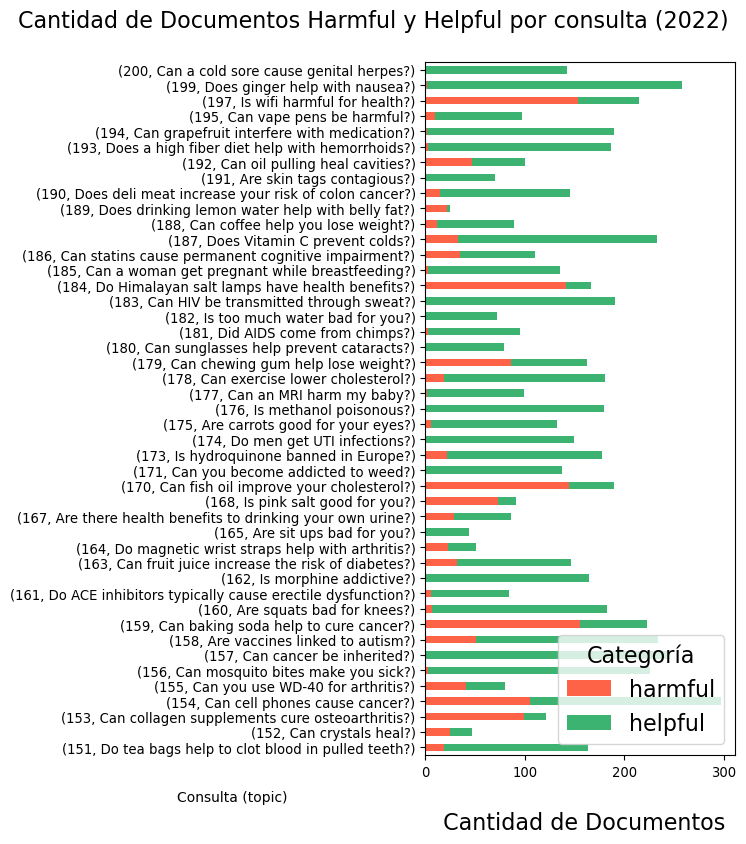

In [340]:
conteo_2022.plot(kind="barh", stacked=True, color=["tomato", "mediumseagreen"], figsize=(4, 9))
plt.xlabel("\n Cantidad de Documentos")
plt.ylabel("")
plt.title("Cantidad de Documentos Harmful y Helpful por consulta (2022) \n", loc='right')
plt.legend(title="Categoría")
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.text(-250, -3.5, "Consulta (topic)", fontsize=10, rotation=0)

plt.show()

In [341]:
# Agrupamos por la pregunta y sumamos los valores. Por si hubiera duplicados.
conteo_grouped_2022 = conteo_2022.groupby("question").sum()

conteo_sort_harmful_2022 = conteo_grouped_2022.sort_values(by="harmful", ascending=False).head(10)
conteo_sort_helpful_2022 = conteo_grouped_2022.sort_values(by="helpful", ascending=False).head(10) 

## Topics con más documentos Harmful

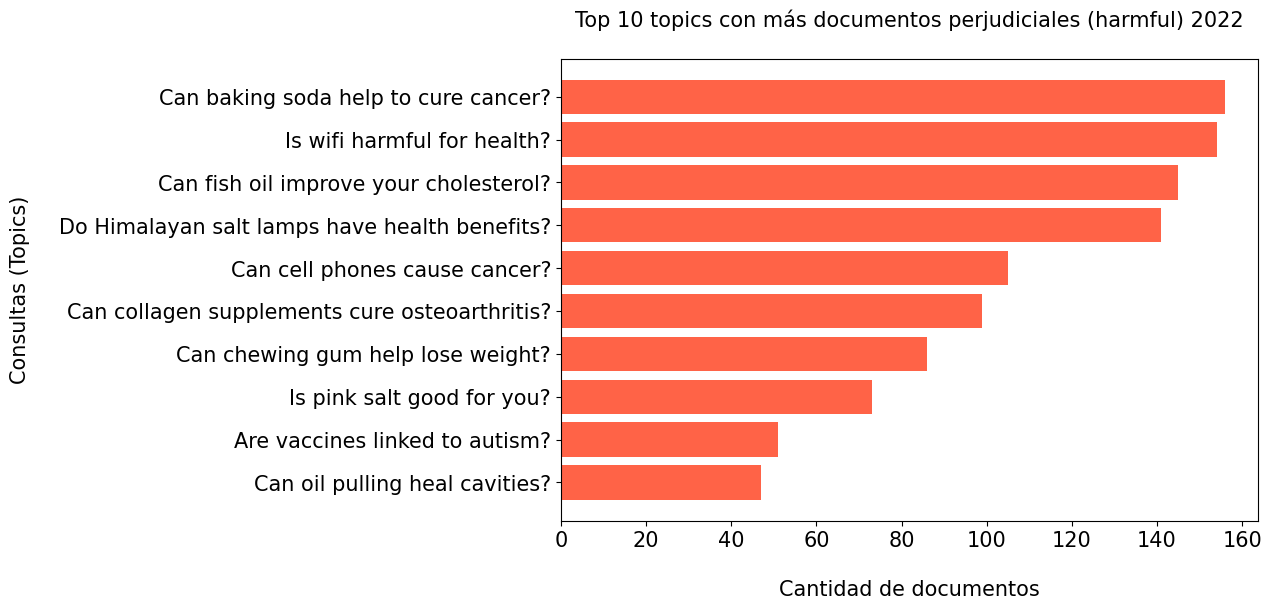

In [342]:
# Topics con más docus harmful

plt.figure(figsize=(9, 6))
plt.barh(conteo_sort_harmful_2022.index, conteo_sort_harmful_2022["harmful"], color="tomato")
plt.xlabel("\nCantidad de documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.title("Top 10 topics con más documentos perjudiciales (harmful) 2022\n", fontsize=15)
plt.gca().invert_yaxis()

plt.show()

### Comparativa con documentos Helpful

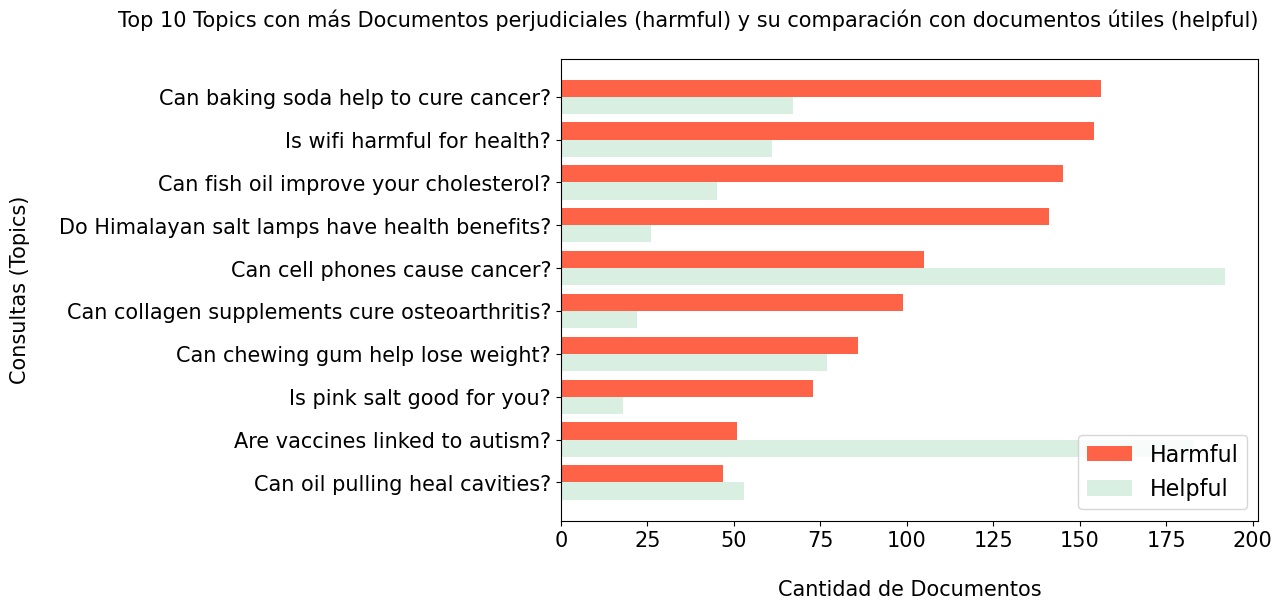

In [343]:
plt.figure(figsize=(9, 6))

y = range(len(conteo_sort_harmful_2022))  # Cambiado a conteo_sort_harmful
bar_width = 0.4

# harmful (rojo)
plt.barh(y, conteo_sort_harmful_2022["harmful"], color="tomato", label="Harmful", height=bar_width)

# helpful (verde), desplazado un poco hacia abajo
plt.barh([i + bar_width for i in y], conteo_sort_harmful_2022["helpful"], color="mediumseagreen", alpha=0.2, label="Helpful", height=bar_width)

plt.xlabel("\nCantidad de Documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.title("Top 10 Topics con más Documentos perjudiciales (harmful) y su comparación con documentos útiles (helpful)\n", fontsize=15, loc='right')
plt.yticks([i + bar_width / 2 for i in y], conteo_sort_harmful_2022.index)  # Cambiado a conteo_sort_harmful
plt.legend()
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.gca().invert_yaxis()

plt.show()

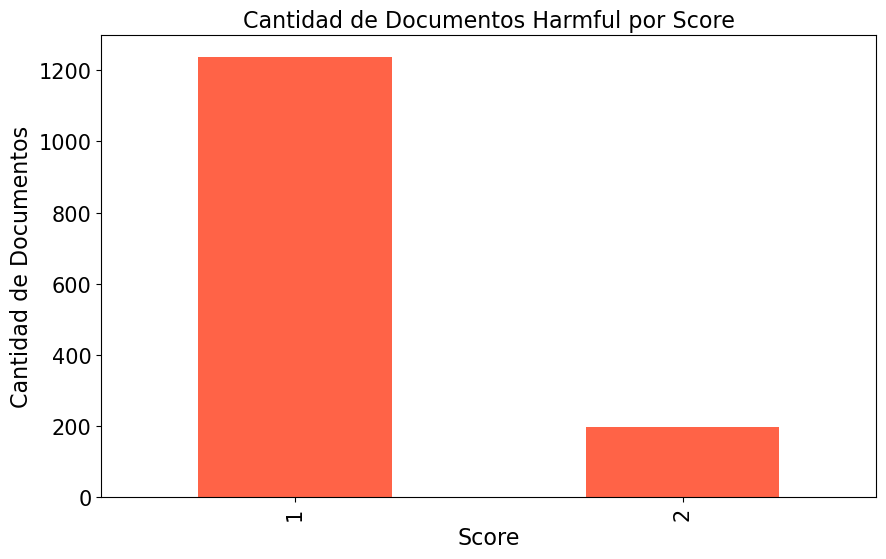

In [344]:
harmful_scores = qrels_2022_harmful["score"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
harmful_scores.plot(kind="bar", color="tomato")
plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Harmful por Score")
plt.show()

## Topics con más documentos Helpful

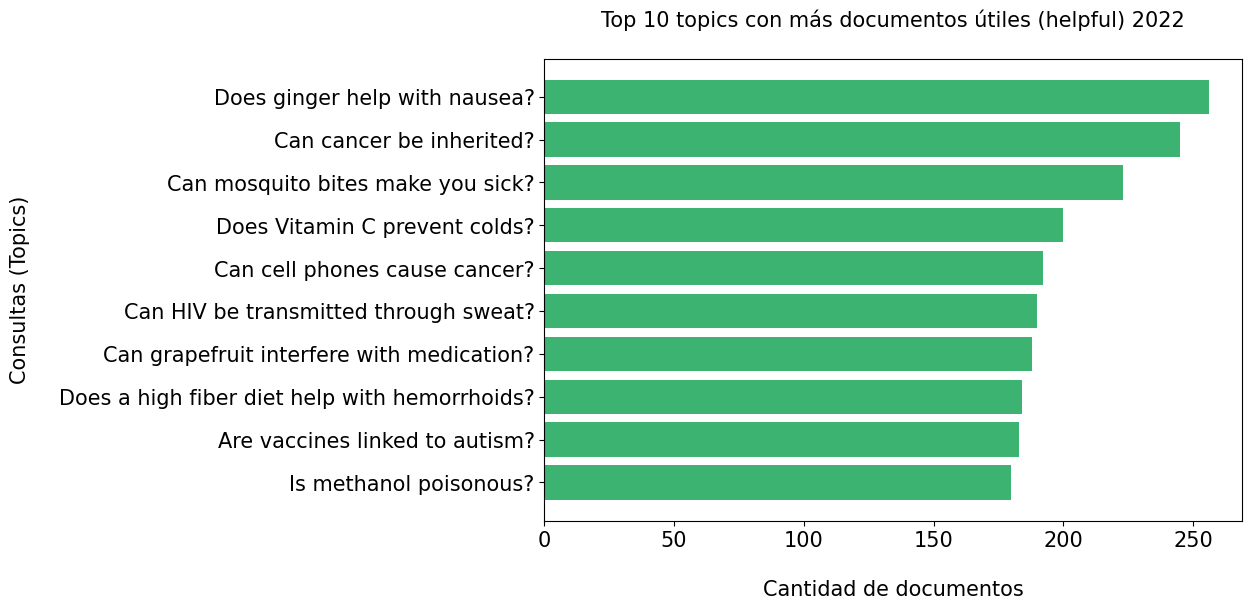

In [345]:
# Topics con más docus helpful
plt.figure(figsize=(9, 6))
plt.barh(conteo_sort_helpful_2022.index, conteo_sort_helpful_2022["helpful"], color="mediumseagreen")
plt.xlabel("\nCantidad de documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.title("Top 10 topics con más documentos útiles (helpful) 2022\n", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

### Comparativa con documentos Harmful

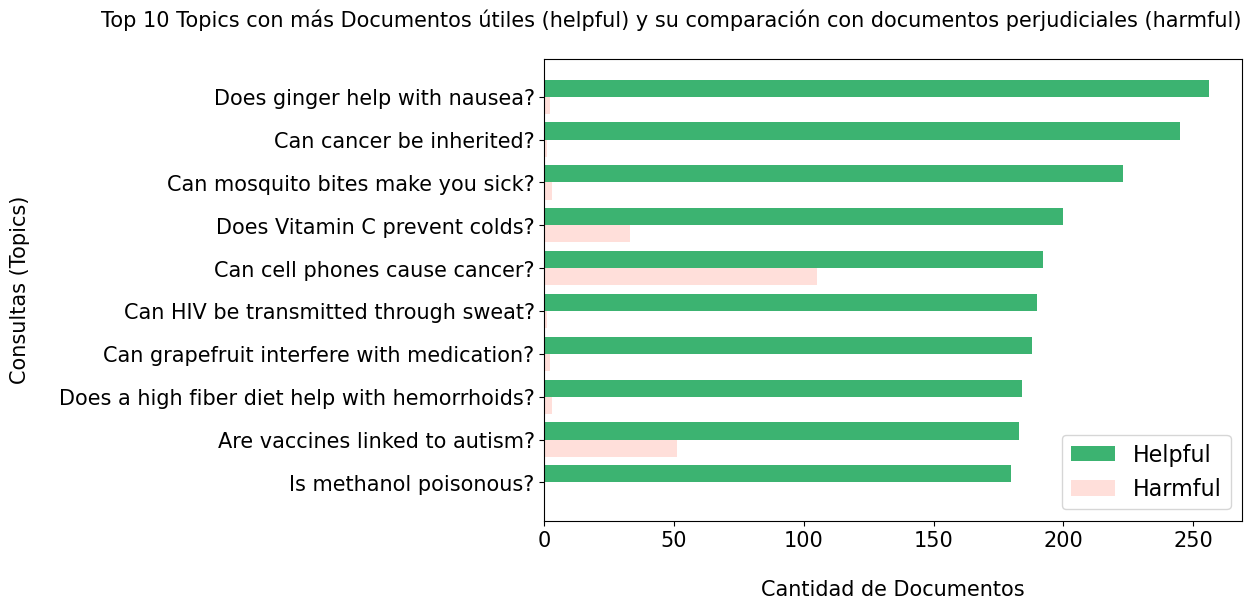

In [346]:
plt.figure(figsize=(9, 6))

y = range(len(conteo_sort_helpful_2022))
bar_width = 0.4

# helpful (green)
plt.barh(y, conteo_sort_helpful_2022["helpful"], color="mediumseagreen", label="Helpful", height=bar_width)

# harmful (red), desplazado un poco hacia abajo
plt.barh([i + bar_width for i in y], conteo_sort_helpful_2022["harmful"], color="tomato", alpha=0.2, label="Harmful", height=bar_width)

plt.xlabel("\nCantidad de Documentos", fontsize=15)
plt.ylabel("Consultas (Topics)\n", fontsize=15)
plt.title("Top 10 Topics con más Documentos útiles (helpful) y su comparación con documentos perjudiciales (harmful)\n", fontsize=15, loc='right')
plt.yticks([i + bar_width / 2 for i in y], conteo_sort_helpful_2022.index)
plt.legend()
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15) 
plt.gca().invert_yaxis()

plt.show()

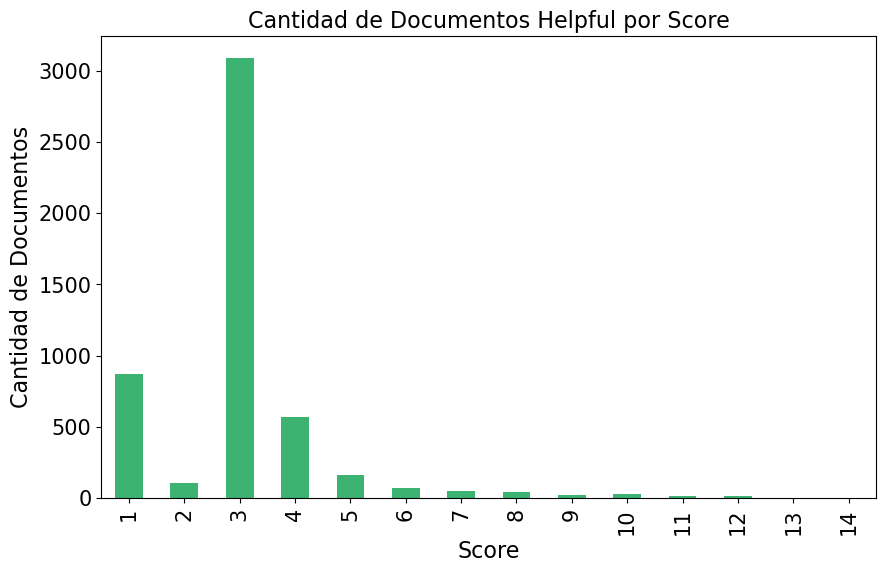

In [347]:
# Contar la cantidad de documentos helpful por cada grado
helpful_score = qrels_2022_helpful["score"].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
helpful_score.plot(kind="bar", color="mediumseagreen")
plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Helpful por Score")
plt.show()

## Cantidad de documentos Helpful y Harmful por Score

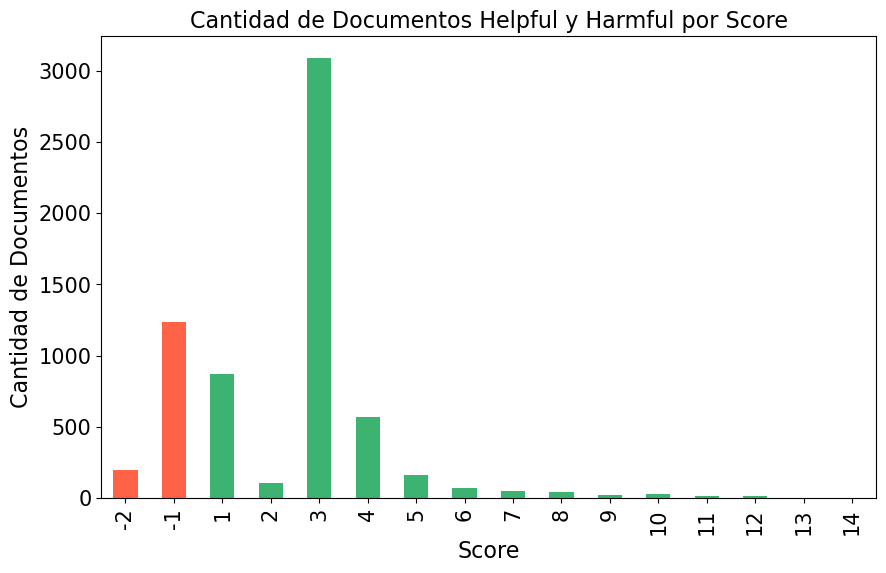

In [348]:
qrels_2022_allscores = qrels_2022

qrels_2022_allscores.loc[qrels_2022_allscores["category"] == "harmful", "score"] *= -1

score_counts = qrels_2022_allscores["score"].value_counts().sort_index()

# Asignar colores: rojo para harmful, verde para helpful
colors = ["tomato" if score < 0 else "mediumseagreen" for score in score_counts.index]

plt.figure(figsize=(10, 6))
score_counts.plot(kind="bar", color=colors)

plt.xlabel("Score")
plt.ylabel("Cantidad de Documentos")
plt.title("Cantidad de Documentos Helpful y Harmful por Score")

plt.show()

# Comparativas anuales

In [349]:
qrels_2020["year"] = 2020
qrels_2021["year"] = 2021
qrels_2022["year"] = 2022

qrels_all = pd.concat([qrels_2020, qrels_2021, qrels_2022], ignore_index=True)

<Figure size 1000x600 with 0 Axes>

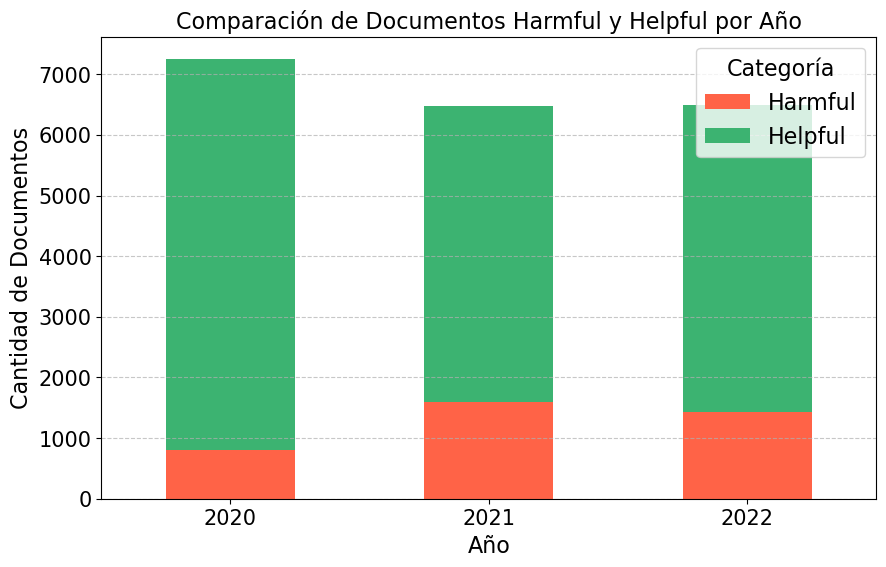

In [350]:
yearly_counts = qrels_all.groupby(["year", "category"])["docno"].count().unstack()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind="bar", stacked=True, color=["tomato", "mediumseagreen"], figsize=(10, 6))

plt.title("Comparación de Documentos Harmful y Helpful por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Documentos")
plt.legend(title="Categoría", labels=["Harmful", "Helpful"])
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Guardar datasets

In [351]:
qrels_2020.to_csv("datasets/qrels/qrels_2020.csv", index=False)
qrels_2021.to_csv("datasets/qrels/qrels_2021.csv", index=False)
qrels_2022.to_csv("datasets/qrels/qrels_2022.csv", index=False)